In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ujy22\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 데이터 로드 및 구조 파악

train.csv [파일]
- item_id : 무역품 식별 ID
- year : 년
- month : 월
- seq : 동일 년-월 내 일련번호
- type : 유형 구분 코드
- hs4 : HS4 코드
- weight : 중량
- quantity : 수량
- value : 무역량 (정수형)


sample_submission.csv [파일]
- leading_item_id : 선행 무역품 식별 ID
- following_item_id : 후행 무역품 식별 ID
- value : 2025년 8월의 후행 무역품에 예측된 총 무역량 (정수형)

## 데이터 로드

In [3]:
df = pd.read_csv('C:/Users/ujy22/Desktop/국민대_공모전/open/train.csv')

In [4]:
df

,item_id,year,month,seq,type,hs4,weight,quantity,value
0,DEWLVASR,2022,1,1.0,1,3038,14858.0,0.0,32688.0
1,ELQGMQWE,2022,1,1.0,1,2002,62195.0,0.0,110617.0
2,AHMDUILJ,2022,1,1.0,1,2102,18426.0,0.0,72766.0
3,XIPPENFQ,2022,1,1.0,1,2501,20426.0,0.0,11172.0
4,FTSVTTSR,2022,1,1.0,1,2529,248000.0,0.0,143004.0
...,...,...,...,...,...,...,...,...,...
10831,XIFHSOWQ,2025,7,3.0,1,8708,352.0,0.0,12937.0
10832,FITUEHWN,2025,7,3.0,1,8714,655.0,900.0,16054.0
10833,UGEQLMXM,2025,7,3.0,1,8714,758.0,0.0,74377.0
10834,BLANHGYY,2025,7,3.0,1,9022,345.0,2.0,69720.0


## 데이터 정보 탐색

In [5]:
df.info() # 결측 없음, 타입도 ㅇㅋ 이상치는 확인 해봐야할듯 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10836 entries, 0 to 10835
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item_id   10836 non-null  object 
 1   year      10836 non-null  int64  
 2   month     10836 non-null  int64  
 3   seq       10836 non-null  float64
 4   type      10836 non-null  int64  
 5   hs4       10836 non-null  int64  
 6   weight    10836 non-null  float64
 7   quantity  10836 non-null  float64
 8   value     10836 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 762.0+ KB


In [6]:
df['hs4'].unique()

array([3038, 2002, 2102, 2501, 2529, 2805, 2807, 2811, 2814, 2825, 2833,
       2836, 2841, 2846, 2847, 2916, 3006, 3102, 3206, 3207, 3215, 3307,
       3404, 3806, 3815, 3824, 3904, 3909, 4202, 4601, 4802, 5111, 5205,
       5309, 5402, 5515, 5602, 5609, 5705, 6101, 6211, 7202, 7207, 8102,
       8105, 8461, 8467, 8479, 8501, 8505, 8527, 8708, 8714, 9403, 1210,
       3813, 4408, 4810, 5512, 2701, 7907, 2710, 6006, 5119, 9022, 4403,
       3003, 2612, 4302, 7142, 3024], dtype=int64)

## 변수별 특징 탐색

In [7]:
# year, month, seq 범위
print("year range:", df["year"].min(), " ~ ", df["year"].max())
print("month range:", df["month"].min(), " ~ ", df["month"].max())
print("seq unique:", sorted(df["seq"].unique()),'\n')

#연도별 행 수
print("연도별 행 수:")
print(df['year'].value_counts().sort_index(),'\n')

#월별 행 수
print("월별 행 수:")
print(df['month'].value_counts().sort_index(),'\n')

#seq 값 분포
print("seq 값 분포:")
print(df['seq'].value_counts().sort_index(),'\n')

# item_id / hs4 개수
print("고유 item_id 개수:", df['item_id'].nunique())
print("고유 hs4 개수:", df['hs4'].nunique(),'\n')

#item_id별 시계열 길이(몇 행씩 있는지)
item_len_stats = df.groupby('item_id').size().describe()
print("item_id별 행 수 통계:")
print(item_len_stats,'\n')

# hs4별 상위 몇 개 빈도
hs4_counts = df["hs4"].value_counts()
print(hs4_counts.head(10))

year range: 2022  ~  2025
month range: 1  ~  12
seq unique: [1.0, 2.0, 3.0] 

연도별 행 수:
year
2022    2994
2023    3028
2024    3043
2025    1771
Name: count, dtype: int64 

월별 행 수:
month
1      991
2     1022
3      997
4     1008
5     1004
6     1000
7     1033
8      743
9      757
10     743
11     761
12     777
Name: count, dtype: int64 

seq 값 분포:
seq
1.0    3405
2.0    3655
3.0    3776
Name: count, dtype: int64 

고유 item_id 개수: 100
고유 hs4 개수: 71 

item_id별 행 수 통계:
count    100.000000
mean     108.360000
std       36.621603
min        2.000000
25%      107.250000
50%      129.000000
75%      129.000000
max      129.000000
dtype: float64 

hs4
2805    646
3824    535
2811    516
8501    423
8505    387
8102    377
2807    354
3815    310
8714    258
2846    258
Name: count, dtype: int64


In [8]:
## 베이스라인 전처리

# year, month, item_id 기준으로 value 합산 (seq만 다르다면 value 합산)
monthly = (df.groupby(["item_id", "year", "month"], as_index=False)["value"].sum())

# year, month를 하나의 키(ym)로 묶기
monthly["ym"] = pd.to_datetime(
    monthly["year"].astype(str) + "-" + monthly["month"].astype(str).str.zfill(2)
)

# item_id × ym 피벗 (월별 총 무역량 매트릭스 생성)
pivot = (
    monthly
    .pivot(index="item_id", columns="ym", values="value")
    .fillna(0.0)
)

pivot.head()

ym,2022-01-01,2022-02-01,2022-03-01,2022-04-01,2022-05-01,2022-06-01,2022-07-01,2022-08-01,2022-09-01,2022-10-01,...,2024-10-01,2024-11-01,2024-12-01,2025-01-01,2025-02-01,2025-03-01,2025-04-01,2025-05-01,2025-06-01,2025-07-01
item_id,,,,,,,,,,,,,,,,,,,,,
AANGBULD,14276.0,52347.0,53549.0,0.0,26997.0,84489.0,0.0,0.0,0.0,0.0,...,428725.0,144248.0,26507.0,25691.0,25805.0,0.0,38441.0,0.0,441275.0,533478.0
AHMDUILJ,242705.0,120847.0,197317.0,126142.0,71730.0,149138.0,186617.0,169995.0,140547.0,89292.0,...,123085.0,143451.0,78649.0,125098.0,80404.0,157401.0,115509.0,127473.0,89479.0,101317.0
ANWUJOKX,0.0,0.0,0.0,63580.0,81670.0,26424.0,8470.0,0.0,0.0,80475.0,...,0.0,0.0,0.0,27980.0,0.0,0.0,0.0,0.0,0.0,0.0
APQGTRMF,383999.0,512813.0,217064.0,470398.0,539873.0,582317.0,759980.0,216019.0,537693.0,205326.0,...,683581.0,2147.0,0.0,25013.0,77.0,20741.0,2403.0,3543.0,32430.0,40608.0
ATLDMDBO,143097177.0,103568323.0,118403737.0,121873741.0,115024617.0,65716075.0,146216818.0,97552978.0,72341427.0,87454167.0,...,60276050.0,30160198.0,42613728.0,64451013.0,38667429.0,29354408.0,42450439.0,37136720.0,32181798.0,57090235.0


In [9]:
df['type'].value_counts() #하나의 범주만 존재해서 삭제처리 해도 될듯

type
1    10836
Name: count, dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,10836.0,2.023331e+03,1.049357e+00,2022.0,2022.00,2023.0,2024.00,2025.0
month,10836.0,6.108435e+00,3.392649e+00,1.0,3.00,6.0,9.00,12.0
seq,10836.0,2.034238e+00,8.133801e-01,1.0,1.00,2.0,3.00,3.0
type,10836.0,1.000000e+00,0.000000e+00,1.0,1.00,1.0,1.00,1.0
hs4,10836.0,4.821970e+03,2.296893e+03,1210.0,2833.00,3824.0,7202.00,9403.0
weight,10836.0,1.098413e+06,5.153790e+06,0.0,345.75,6532.5,155510.75,110491899.0
quantity,10836.0,8.633771e+04,7.614669e+06,0.0,0.00,0.0,0.00,792598955.0
value,10836.0,1.739442e+06,5.457480e+06,0.0,11506.75,125007.0,1039763.50,111041383.0


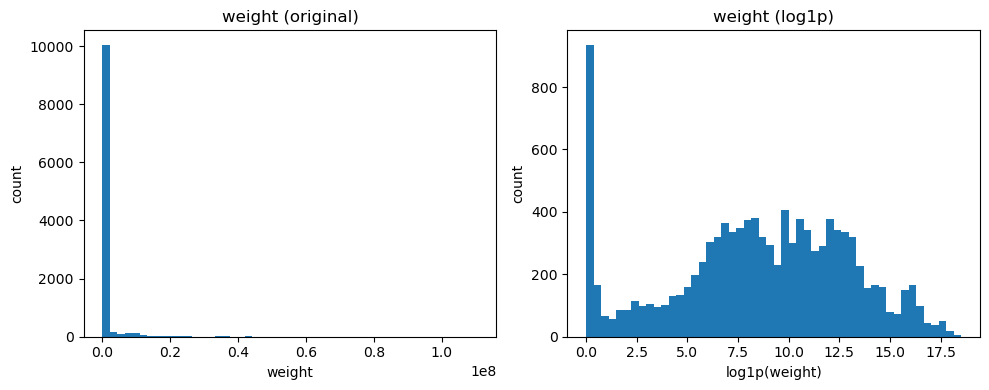

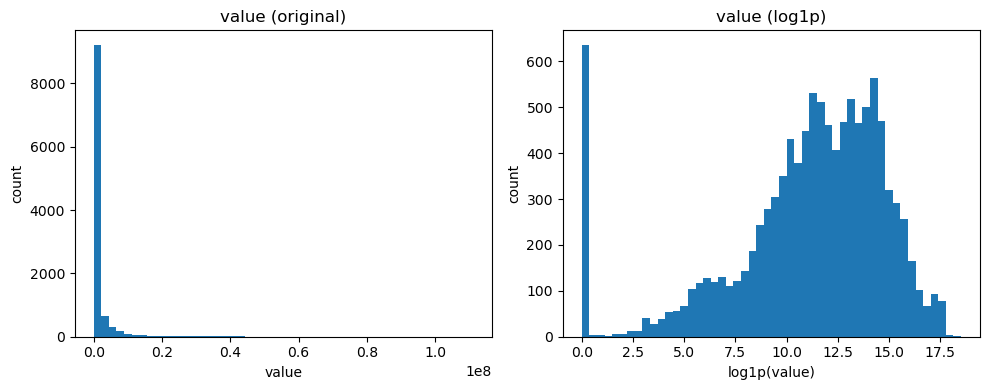

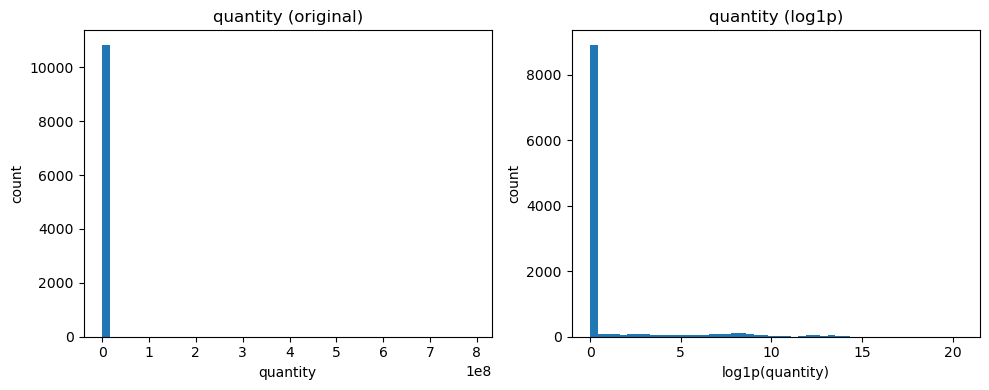

In [11]:
cols = ["weight", "value", "quantity"]

for col in cols:
    x = df[col].clip(lower=0)
    log_x = np.log1p(x)

    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # 왼쪽: 원본
    axes[0].hist(x.dropna(), bins=50)
    axes[0].set_title(f"{col} (original)")
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("count")

    # 오른쪽: log1p
    axes[1].hist(log_x.dropna(), bins=50)
    axes[1].set_title(f"{col} (log1p)")
    axes[1].set_xlabel(f"log1p({col})")
    axes[1].set_ylabel("count")

    plt.tight_layout()
    plt.show()


## quantity는 로그변환 해도 0이 너무 많아서 0이냐 / 0이 아니냐로 나누는 건 어떤지?
## has_quantity = (quantity > 0).astype(int)
##log_quantity = np.log1p(quantity.clip(lower=0))


In [33]:
df["log_weight"] = np.log1p(df["weight"])
df["log_value"]  = np.log1p(df["value"])
df["log_quantity"]  = np.log1p(df["quantity"])
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,10836.0,2.023331e+03,1.049357e+00,2022.0,2022.000000,2023.000000,2.024000e+03,2.025000e+03
month,10836.0,6.108435e+00,3.392649e+00,1.0,3.000000,6.000000,9.000000e+00,1.200000e+01
seq,10836.0,2.034238e+00,8.133801e-01,1.0,1.000000,2.000000,3.000000e+00,3.000000e+00
type,10836.0,1.000000e+00,0.000000e+00,1.0,1.000000,1.000000,1.000000e+00,1.000000e+00
hs4,10836.0,4.821970e+03,2.296893e+03,1210.0,2833.000000,3824.000000,7.202000e+03,9.403000e+03
weight,10836.0,1.098413e+06,5.153790e+06,0.0,345.750000,6532.500000,1.555108e+05,1.104919e+08
quantity,10836.0,8.633771e+04,7.614669e+06,0.0,0.000000,0.000000,0.000000e+00,7.925990e+08
value,10836.0,1.739442e+06,5.457480e+06,0.0,11506.750000,125007.000000,1.039764e+06,1.110414e+08
log_weight,10836.0,8.493306e+00,4.501891e+00,0.0,5.848603,8.784698,1.195448e+01,1.852045e+01
log_value,10836.0,1.098770e+01,4.024882e+00,0.0,9.350776,11.736133,1.385450e+01,1.852541e+01


In [13]:
cols = ["quantity", "value", "weight"]

total = len(df)
print(f"전체 행 수: {total}\n")

for col in cols:
    gt0_cnt = (df[col] > 0).sum()
    gt0_ratio = gt0_cnt / total * 100
    
    print(f"[{col}]")
    print(f"  > 0 인 행 수   : {gt0_cnt:,}개")
    print(f"  > 0 비율       : {gt0_ratio:.2f}%")
    print()

전체 행 수: 10836

[quantity]
  > 0 인 행 수   : 1,917개
  > 0 비율       : 17.69%

[value]
  > 0 인 행 수   : 10,200개
  > 0 비율       : 94.13%

[weight]
  > 0 인 행 수   : 9,901개
  > 0 비율       : 91.37%



In [14]:
cond_value0 = df["value"] == 0

# value가 0인 행에서 weight, quantity가 동시에 0인 비율
both_zero_ratio = ((df.loc[cond_value0, "weight"] == 0) & 
                   (df.loc[cond_value0, "quantity"] == 0)).mean()

print(f"value=0 인 행 중에서 weight, quantity 둘다 0인 비율: {both_zero_ratio:.3f}")

value=0 인 행 중에서 weight, quantity 둘다 0인 비율: 0.998


In [15]:
print(df[(df['value']==0)&(df['weight']>0)]) #무역량은 0이지만 무게와 수량이 존재하는 컬럼 -> 이상치?

df[(df['value']==0)&(df['value']>0)] #없음

df[(df['value']==0)&(df['value']>0)&(df['weight']>0)] #없음

       item_id  year  month  seq  type   hs4  weight  quantity  value  \
9288  WHPUAOID  2025      1  3.0     1  5512     1.0       1.0    0.0   

      log_weight  log_value  
9288    0.693147        0.0  


,item_id,year,month,seq,type,hs4,weight,quantity,value,log_weight,log_value


In [16]:
## 여기서 드는 의문... 수량이 0인 행이 많단 말이죠 그럼 수량이 0인데 weight랑 value값이 있는 경우는 어떤 식으로 해석해야 할지?
df[df['quantity']==0]

,item_id,year,month,seq,type,hs4,weight,quantity,value,log_weight,log_value
0,DEWLVASR,2022,1,1.0,1,3038,14858.0,0.0,32688.0,9.606361,10.394794
1,ELQGMQWE,2022,1,1.0,1,2002,62195.0,0.0,110617.0,11.038046,11.613838
2,AHMDUILJ,2022,1,1.0,1,2102,18426.0,0.0,72766.0,9.821572,11.195018
3,XIPPENFQ,2022,1,1.0,1,2501,20426.0,0.0,11172.0,9.924613,9.321255
4,FTSVTTSR,2022,1,1.0,1,2529,248000.0,0.0,143004.0,12.421188,11.870635
...,...,...,...,...,...,...,...,...,...,...,...
10828,GYHKIVQT,2025,7,3.0,1,8505,264321.0,0.0,11887132.0,12.484923,16.290967
10829,ROACSLMG,2025,7,3.0,1,8505,273566.0,0.0,887924.0,12.519302,13.696643
10831,XIFHSOWQ,2025,7,3.0,1,8708,352.0,0.0,12937.0,5.866468,9.467924
10833,UGEQLMXM,2025,7,3.0,1,8714,758.0,0.0,74377.0,6.632002,11.216915


In [17]:
total = len(df)

cond_q_zero = df["quantity"] == 0
cond_q_pos  = df["quantity"] > 0
cond_w_zero = df["weight"] == 0
cond_w_pos  = df["weight"] > 0

case1 = cond_q_zero & cond_w_zero  # quantity=0, weight=0
case2 = cond_q_zero & cond_w_pos   # quantity=0, weight>0  ← 네가 궁금한 애들
case3 = cond_q_pos  & cond_w_zero  # quantity>0, weight=0
case4 = cond_q_pos  & cond_w_pos   # quantity>0, weight>0

def show_case(name, mask):
    cnt = mask.sum()
    print(f"{name}: {cnt:6,d}행 ({cnt/total*100:5.2f}%)")

show_case("1) q=0  & w=0 ", case1)
show_case("2) q=0  & w>0 ", case2)
show_case("3) q>0  & w=0 ", case3)
show_case("4) q>0  & w>0 ", case4)


1) q=0  & w=0 :    923행 ( 8.52%)
2) q=0  & w>0 :  7,996행 (73.79%)
3) q>0  & w=0 :     12행 ( 0.11%)
4) q>0  & w>0 :  1,905행 (17.58%)


In [18]:
df[(df['quantity']==0)&(df['weight']==0)&(df['value']==0)]['seq'].unique()

#모든 값이 0인게 635행 나옴 -> 근데 이건 monthly 데이터로 합산하면 사라지는 행들이라 정상적인걸로 보는게 맞을듯

array([2., 3.])

In [19]:
df[df['item_id']=='DEWLVASR']

,item_id,year,month,seq,type,hs4,weight,quantity,value,log_weight,log_value
0,DEWLVASR,2022,1,1.0,1,3038,14858.0,0.0,32688.0,9.606361,10.394794
74,DEWLVASR,2022,1,2.0,1,3038,7000.0,0.0,27505.0,8.853808,10.222159
154,DEWLVASR,2022,1,3.0,1,3038,0.0,0.0,0.0,0.000000,0.000000
318,DEWLVASR,2022,2,2.0,1,3038,19185.0,0.0,59784.0,9.861936,10.998510
402,DEWLVASR,2022,2,3.0,1,3038,15690.0,0.0,49290.0,9.660843,10.805497
...,...,...,...,...,...,...,...,...,...,...,...
10405,DEWLVASR,2025,6,2.0,1,3038,58610.0,0.0,235909.0,10.978678,12.371206
10487,DEWLVASR,2025,6,3.0,1,3038,17930.0,0.0,79495.0,9.794286,11.283462
10575,DEWLVASR,2025,7,1.0,1,3038,18755.0,0.0,87954.0,9.839269,11.384581
10658,DEWLVASR,2025,7,2.0,1,3038,81523.0,0.0,284750.0,11.308653,12.559370


In [20]:
monthly[monthly['item_id']=='DEWLVASR']

,item_id,year,month,value,ym
581,DEWLVASR,2022,1,60193.0,2022-01-01
582,DEWLVASR,2022,2,109074.0,2022-02-01
583,DEWLVASR,2022,3,51123.0,2022-03-01
584,DEWLVASR,2022,4,7111.0,2022-04-01
585,DEWLVASR,2022,5,157348.0,2022-05-01
586,DEWLVASR,2022,6,313372.0,2022-06-01
587,DEWLVASR,2022,7,104852.0,2022-07-01
588,DEWLVASR,2022,8,246652.0,2022-08-01
589,DEWLVASR,2022,9,103737.0,2022-09-01
590,DEWLVASR,2022,11,185367.0,2022-11-01


## 결측치 이상치

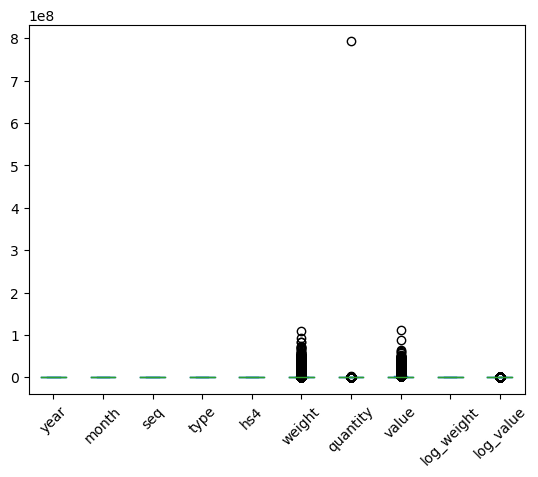

In [21]:
df.plot(kind='box')
plt.xticks(rotation=45)
plt.show()

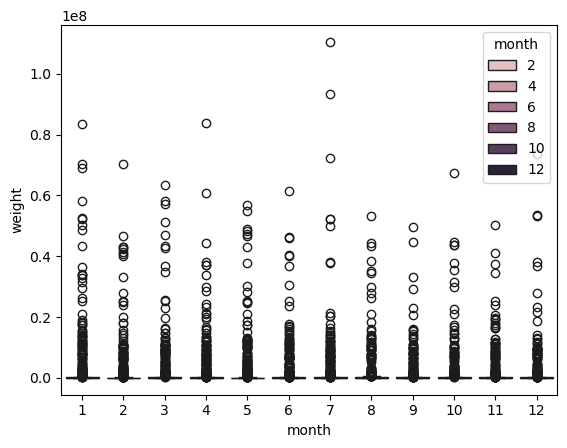

In [22]:
sns.boxplot(data=df, x= 'month'
            , y="weight"
            , hue='month'
            )
plt.show()

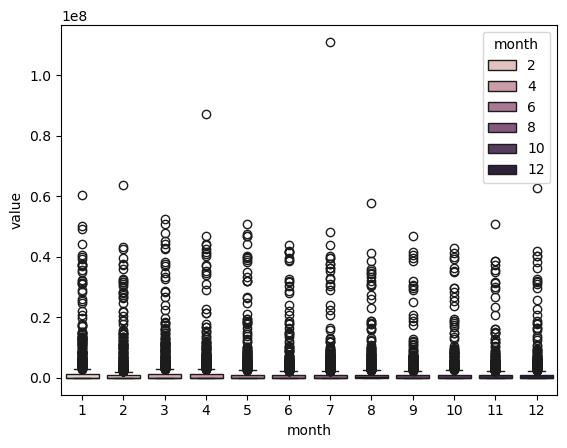

In [23]:
sns.boxplot(data=df, x= 'month'
            , y="value"
            , hue='month'
            )
plt.show()

## 변수 분포 시각화

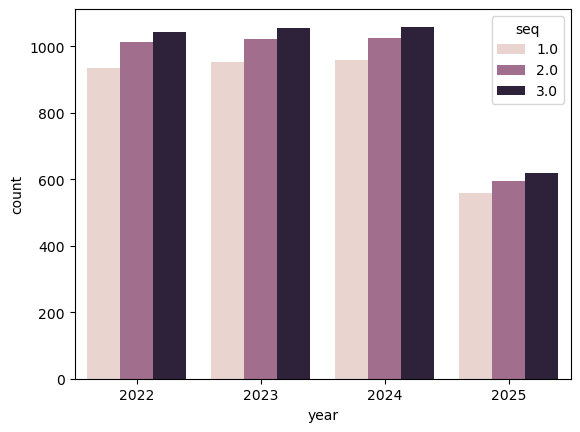

In [24]:
sns.countplot(data=df, x="year", hue="seq")
plt.show()

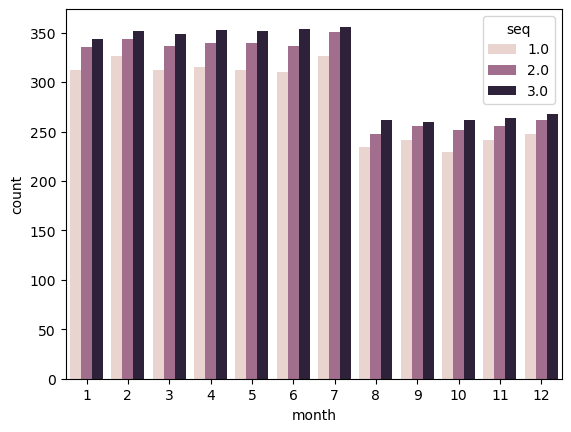

In [25]:
sns.countplot(data=df, x="month", hue="seq")
plt.show()

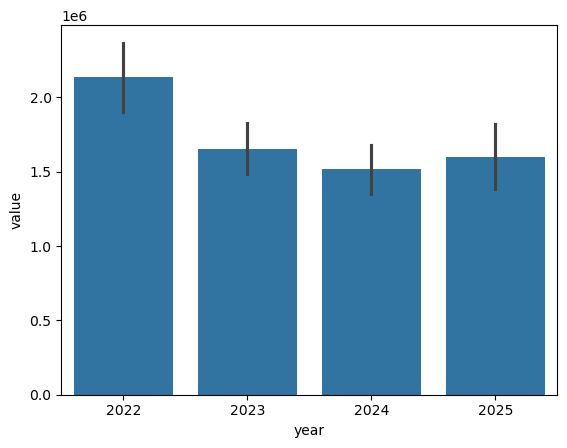

In [26]:
sns.barplot(data=df, x="year", y="value")
plt.show()

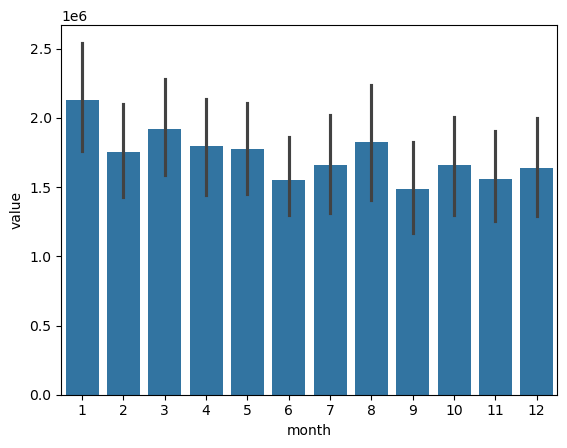

In [27]:
sns.barplot(data=df, x="month", y="value")
plt.show()

## 변수 관계 시각화(4번)

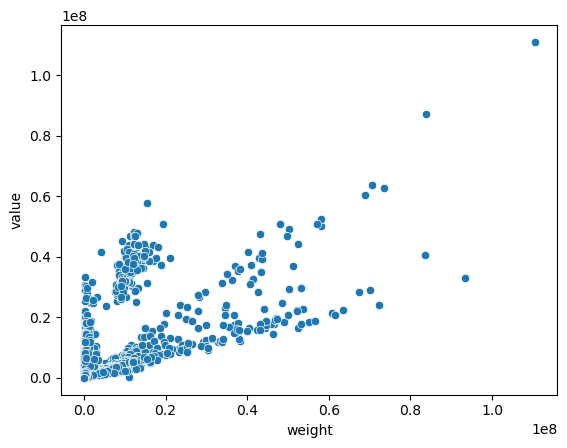

In [36]:
# quantity, value 간의 관계
sns.scatterplot(df, x="weight", y="value") 
plt.show()

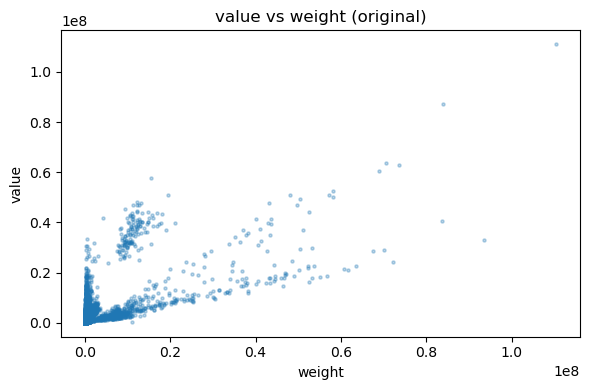

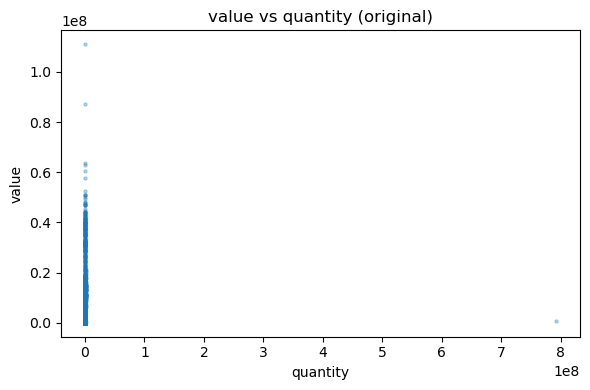

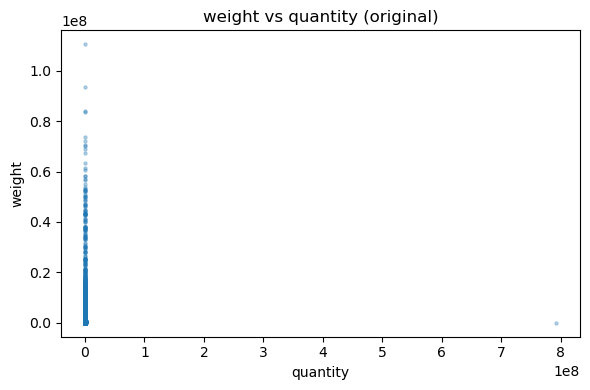

In [31]:
pairs = [
    ("weight", "value"),
    ("quantity", "value"),
    ("quantity", "weight")
]

for x_col, y_col in pairs:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[x_col], df[y_col], s=5, alpha=0.3)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{y_col} vs {x_col} (original)")
    plt.tight_layout()
    plt.show()

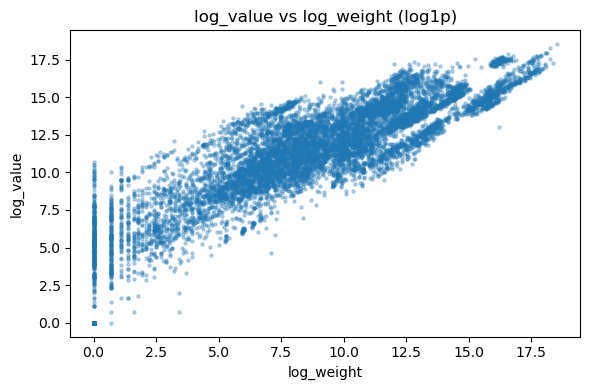

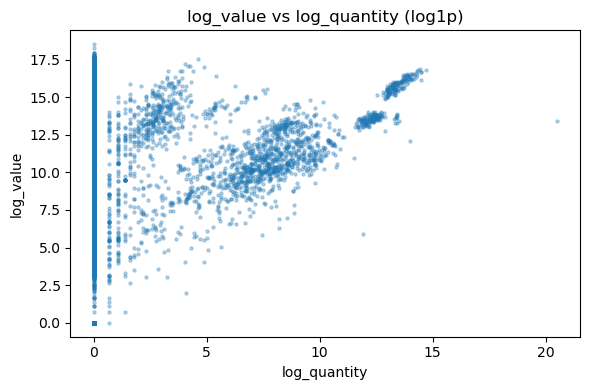

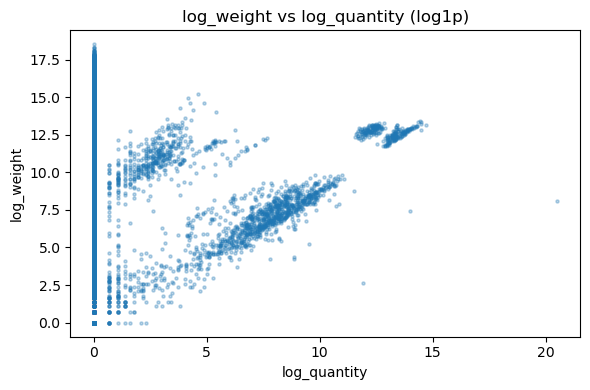

In [34]:
log_pairs = [
    ("log_weight", "log_value"),
    ("log_quantity", "log_value"),
    ("log_quantity", "log_weight")
]

for x_col, y_col in log_pairs:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[x_col], df[y_col], s=5, alpha=0.3)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f"{y_col} vs {x_col} (log1p)")
    plt.tight_layout()
    plt.show()


### log 변환 포함 전체 상관계수 (correlation matrix)

                 value    weight  quantity  log_value  log_weight  \
value         1.000000  0.670956 -0.000050   0.403315    0.426250   
weight        0.670956  1.000000 -0.002299   0.274342    0.375435   
quantity     -0.000050 -0.002299  1.000000   0.007598    0.000630   
log_value     0.403315  0.274342  0.007598   1.000000    0.877453   
log_weight    0.426250  0.375435  0.000630   0.877453    1.000000   
log_quantity -0.005796 -0.075194  0.070486   0.108709    0.039114   

              log_quantity  
value            -0.005796  
weight           -0.075194  
quantity          0.070486  
log_value         0.108709  
log_weight        0.039114  
log_quantity      1.000000  


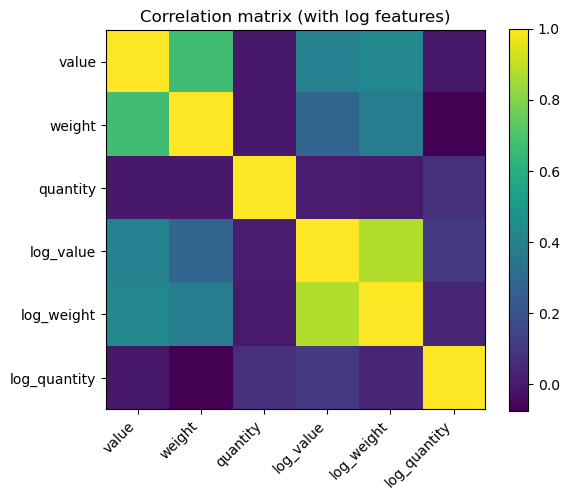

In [37]:
num_cols = ["value", "weight", "quantity",
            "log_value", "log_weight", "log_quantity"]

corr = df[num_cols].corr()
print(corr)

# 시각화 (matplotlib heatmap)
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(corr, interpolation="nearest")
fig.colorbar(im, ax=ax)

ax.set_xticks(range(len(num_cols)))
ax.set_yticks(range(len(num_cols)))
ax.set_xticklabels(num_cols, rotation=45, ha="right")
ax.set_yticklabels(num_cols)

ax.set_title("Correlation matrix (with log features)")
plt.tight_layout()
plt.show()


### 4-4. outlier map

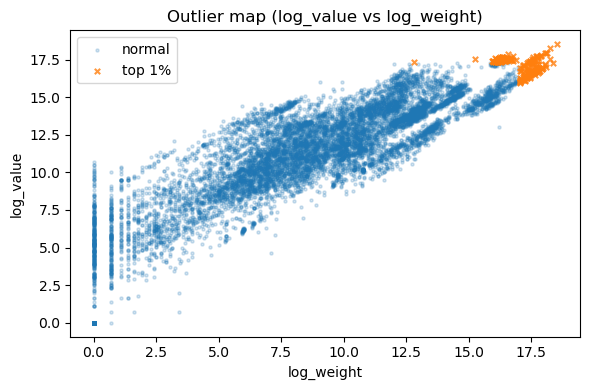

,item_id,year,month,seq,weight,value,quantity
17,ATLDMDBO,2022,1,1.0,68878617.0,60548596.0,0.0
27,LRVGFDFM,2022,1,1.0,50311676.0,49185609.0,0.0
28,BTMOEMEP,2022,1,1.0,29575503.0,28495420.0,0.0
92,ATLDMDBO,2022,1,2.0,58061763.0,50308132.0,0.0
115,FCYBOAXC,2022,1,2.0,17336793.0,39280673.0,0.0
173,ATLDMDBO,2022,1,3.0,36368068.0,32240449.0,0.0
183,LRVGFDFM,2022,1,3.0,33825000.0,31449756.0,0.0
197,FCYBOAXC,2022,1,3.0,10103460.0,36875481.0,0.0
257,ATLDMDBO,2022,2,1.0,70474476.0,63846719.0,0.0
280,FCYBOAXC,2022,2,1.0,11205668.0,42476643.0,0.0


In [38]:
x = df["log_weight"]
y = df["log_value"]

x_th = x.quantile(0.99)
y_th = y.quantile(0.99)

outlier_mask = (x > x_th) | (y > y_th)

# 일반 구간
plt.figure(figsize=(6, 4))
plt.scatter(x[~outlier_mask], y[~outlier_mask], s=5, alpha=0.2, marker="o", label="normal")

# 의심 구간(아웃라이어 후보) - 더 진하게/크게 표시
plt.scatter(x[outlier_mask], y[outlier_mask], s=15, alpha=0.8, marker="x", label="top 1%")

plt.xlabel("log_weight")
plt.ylabel("log_value")
plt.title("Outlier map (log_value vs log_weight)")
plt.legend()
plt.tight_layout()
plt.show()

# 아웃라이어 후보 몇 개 표로 보기
outliers = df[outlier_mask].copy()
outliers_preview = outliers[["item_id", "year", "month", "seq",
                             "weight", "value", "quantity"]].head(20)
outliers_preview


In [69]:
x = df["log_weight"]
y = df["log_value"]

# 상위 1% 기준 (둘 중 하나라도 크면 outlier로 정의한 경우)
x_th = x.quantile(0.99)
y_th = y.quantile(0.99)
out_mask = (x > x_th) | (y > y_th)

# 아웃라이어 몇 개만 확인
outliers = df[out_mask].copy()
outliers_preview = outliers[["item_id", "year", "month", "seq",
                             "weight", "value", "quantity"]].head(20)
outliers_preview


,item_id,year,month,seq,weight,value,quantity
17,ATLDMDBO,2022,1,1.0,68878617.0,60548596.0,0.0
27,LRVGFDFM,2022,1,1.0,50311676.0,49185609.0,0.0
28,BTMOEMEP,2022,1,1.0,29575503.0,28495420.0,0.0
92,ATLDMDBO,2022,1,2.0,58061763.0,50308132.0,0.0
115,FCYBOAXC,2022,1,2.0,17336793.0,39280673.0,0.0
173,ATLDMDBO,2022,1,3.0,36368068.0,32240449.0,0.0
183,LRVGFDFM,2022,1,3.0,33825000.0,31449756.0,0.0
197,FCYBOAXC,2022,1,3.0,10103460.0,36875481.0,0.0
257,ATLDMDBO,2022,2,1.0,70474476.0,63846719.0,0.0
280,FCYBOAXC,2022,2,1.0,11205668.0,42476643.0,0.0


In [70]:
outliers_preview['item_id'].unique()

array(['ATLDMDBO', 'LRVGFDFM', 'BTMOEMEP', 'FCYBOAXC'], dtype=object)

### 다른 버전

In [47]:
# 0으로 나누기 방지
df["unit_value_w"] = df["value"] / df["weight"].replace(0, np.nan)
df["unit_value_q"] = df["value"] / df["quantity"].replace(0, np.nan)

# 로그 단가
df["log_unit_value_w"] = np.log1p(df["unit_value_w"].clip(lower=0))
df["log_unit_value_q"] = np.log1p(df["unit_value_q"].clip(lower=0))

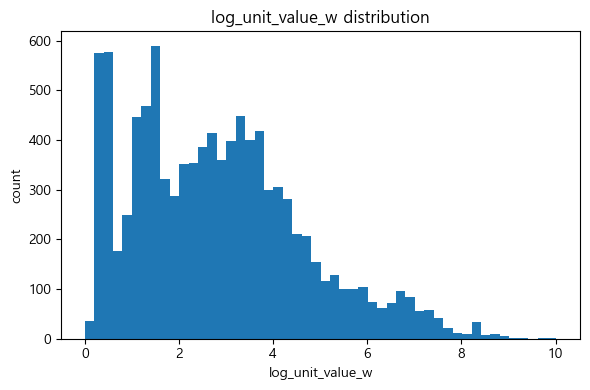

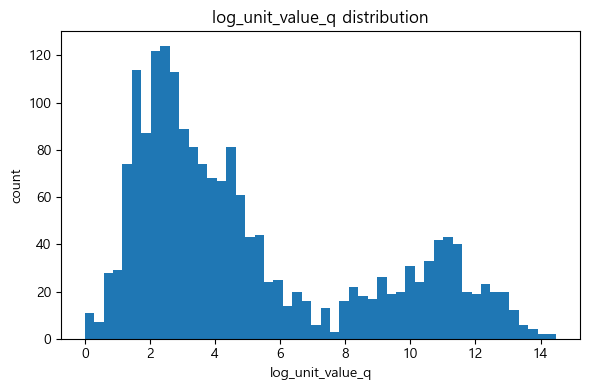

In [48]:
for col in ["log_unit_value_w", "log_unit_value_q"]:
    plt.figure(figsize=(6, 4))
    plt.hist(df[col].dropna(), bins=50)
    plt.title(f"{col} distribution")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.tight_layout()
    plt.show()


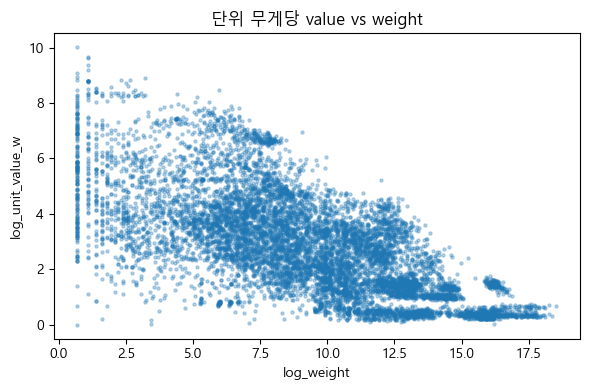

In [49]:
plt.figure(figsize=(6, 4))
plt.scatter(df["log_weight"], df["log_unit_value_w"], s=5, alpha=0.3)
plt.xlabel("log_weight")
plt.ylabel("log_unit_value_w")
plt.title("단위 무게당 value vs weight")
plt.tight_layout()
plt.show()


### hexbin / density scatter

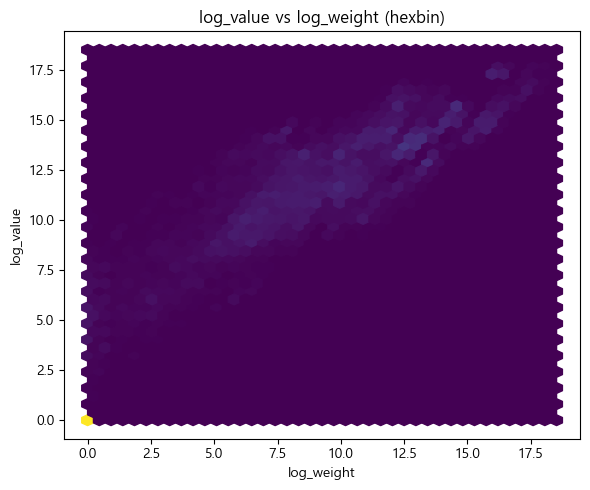

In [50]:
plt.figure(figsize=(6, 5))
plt.hexbin(df["log_weight"], df["log_value"], gridsize=40)
plt.xlabel("log_weight")
plt.ylabel("log_value")
plt.title("log_value vs log_weight (hexbin)")
plt.tight_layout()
plt.show()


### hs4별로 value–weight 상관 비교

In [51]:
# 상위 hs4 10개만
top_hs4 = (
    df["hs4"].value_counts()
      .head(10)
      .index
)

rows = []
for h in top_hs4:
    sub = df[df["hs4"] == h]
    corr_vw = sub["log_value"].corr(sub["log_weight"])
    rows.append({"hs4": h, "corr_log_v_w": corr_vw, "n": len(sub)})

hs4_corr = pd.DataFrame(rows).sort_values("corr_log_v_w", ascending=False)
hs4_corr


,hs4,corr_log_v_w,n
1,3824,0.960498,535
3,8501,0.959779,423
2,2811,0.942809,516
5,8102,0.941965,377
7,3815,0.930701,310
6,2807,0.804345,354
4,8505,0.791291,387
0,2805,0.774772,646
8,8714,0.647456,258
9,2846,0.556430,258


- 같은 HS4 안에서는 무게가 늘면 금액도 거의 비례해서 같이 늘어난다

- 즉, 단가(kg당 가격)가 안정적인 벌크/원자재 계열일 가능성이 높음

- 이 품목군에서는 이번 달 얼마나 무거운 물량이 들어왔만 알아도 금액이 얼마쯤 될지 거의 바로 맞출 수 있다는 뜻

HS4별 log_weight–log_value 상관 분석 결과

상위 10개 HS4 중 5개는 상관계수가 0.94 이상으로,
무게 증가가 곧 금액 증가로 이어지는 단가 안정형 품목군으로 나타남(3824, 8501 등).

반면, 8714·2846 등 일부 HS4는 상관이 0.56~0.65 수준으로,
동일 중량에서도 금액 변동이 큰 고단가/스펙 의존 품목군으로 해석된다.

따라서 value 예측 시, 대부분 품목군에서는 weight 정보를 핵심 피처로 활용하되,
상관이 낮은 HS4에 대해서는 추가 피처(수량, 시점, 품질 등) 기반의 보완이 필요하다.

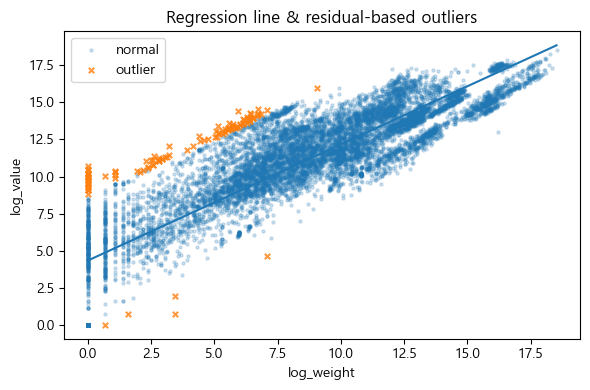

,item_id,year,month,weight,value,quantity
101,ZGJXVMNI,2022,1,162.0,325412.0,0.0
163,SUOYXCHP,2022,1,2.0,30329.0,0.0
182,ZGJXVMNI,2022,1,264.0,824740.0,0.0
249,BSRMSVTC,2022,2,6.0,31755.0,0.0
353,BEZYMBBT,2022,2,1199.0,1912704.0,0.0


In [52]:
# 단순 1차 선형회귀 (log_value ~ log_weight)
x = df["log_weight"].values
y = df["log_value"].values

# 직선계수 (y = a*x + b)
a, b = np.polyfit(x, y, 1)
y_hat = a * x + b
resid = y - y_hat  # 잔차

df["resid_log_vw"] = resid

# 잔차 절댓값이 큰 상위 1%를 outlier로
thr = np.quantile(np.abs(resid), 0.99)
out_mask = np.abs(resid) >= thr

plt.figure(figsize=(6, 4))
plt.scatter(x[~out_mask], y[~out_mask], s=5, alpha=0.2, label="normal")
plt.scatter(x[out_mask], y[out_mask], s=15, alpha=0.8, marker="x", label="outlier")

# 회귀선
xs = np.linspace(x.min(), x.max(), 100)
ys = a * xs + b
plt.plot(xs, ys)

plt.xlabel("log_weight")
plt.ylabel("log_value")
plt.title("Regression line & residual-based outliers")
plt.legend()
plt.tight_layout()
plt.show()

# outlier 몇 개 확인용
df.loc[out_mask, ["item_id", "year", "month", "weight", "value", "quantity"]].head()


## 품목 단위 샘플링(5번)

In [40]:
monthly = (
    df
    .groupby(["item_id", "year", "month"], as_index=False)
    .agg({
        "value": "sum",
        "weight": "sum",
        "quantity": "sum"
    })
)

monthly["ym"] = pd.to_datetime(
    monthly["year"].astype(str) + "-" + monthly["month"].astype(str).str.zfill(2)
)


In [41]:
# 7개 정도 샘플링 (원하면 숫자 바꿔도 됨)
sample_items = (
    monthly["item_id"]
    .drop_duplicates()
    .sample(7, random_state=42)
    .tolist()
)

print("샘플링된 item_id:", sample_items)


샘플링된 item_id: ['VMAQSTJE', 'OGAFEHLU', 'SAAYMURU', 'LRVGFDFM', 'LPHPPJUG', 'KAGJCHMR', 'FDXPMYGF']


C:\Users\ujy22\AppData\Local\Temp\ipykernel_15388\1112749740.py:21: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  plt.tight_layout()
C:\Users\ujy22\AppData\Local\Temp\ipykernel_15388\1112749740.py:21: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  plt.tight_layout()
C:\Users\ujy22\AppData\Local\Temp\ipykernel_15388\1112749740.py:21: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from current font.
  plt.tight_layout()
C:\Users\ujy22\AppData\Local\Temp\ipykernel_15388\1112749740.py:21: UserWarning: Glyph 53556 (\N{HANGUL SYLLABLE TEON}) missing from current font.
  plt.tight_layout()
C:\Users\ujy22\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ujy22\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) miss

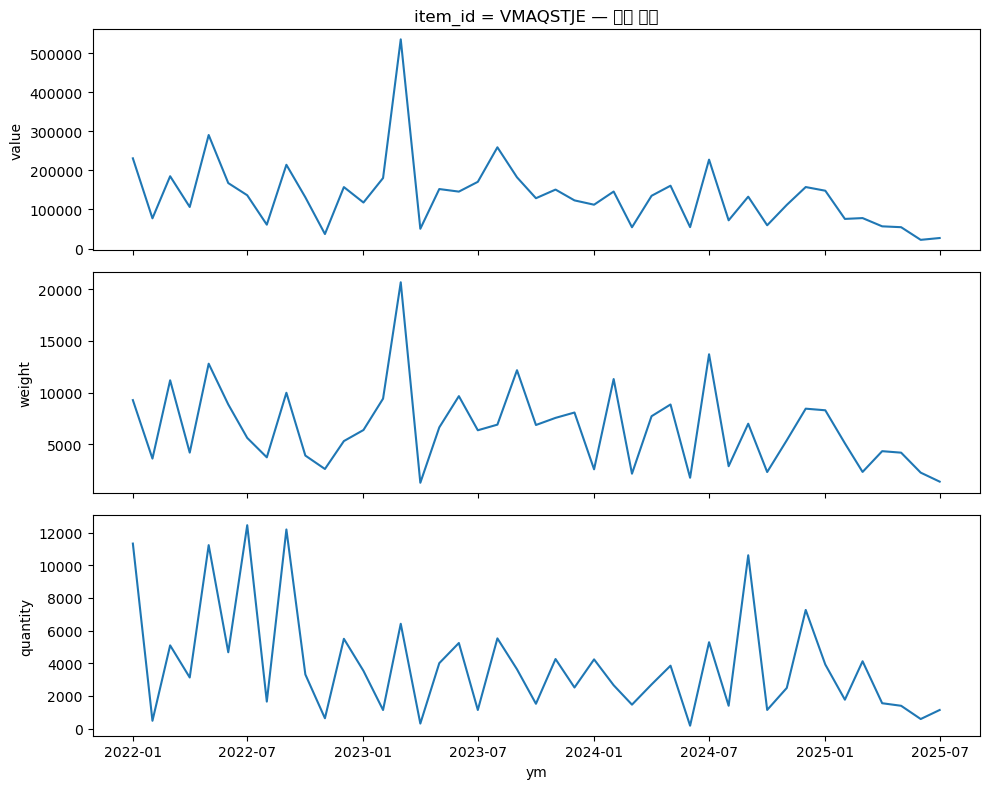

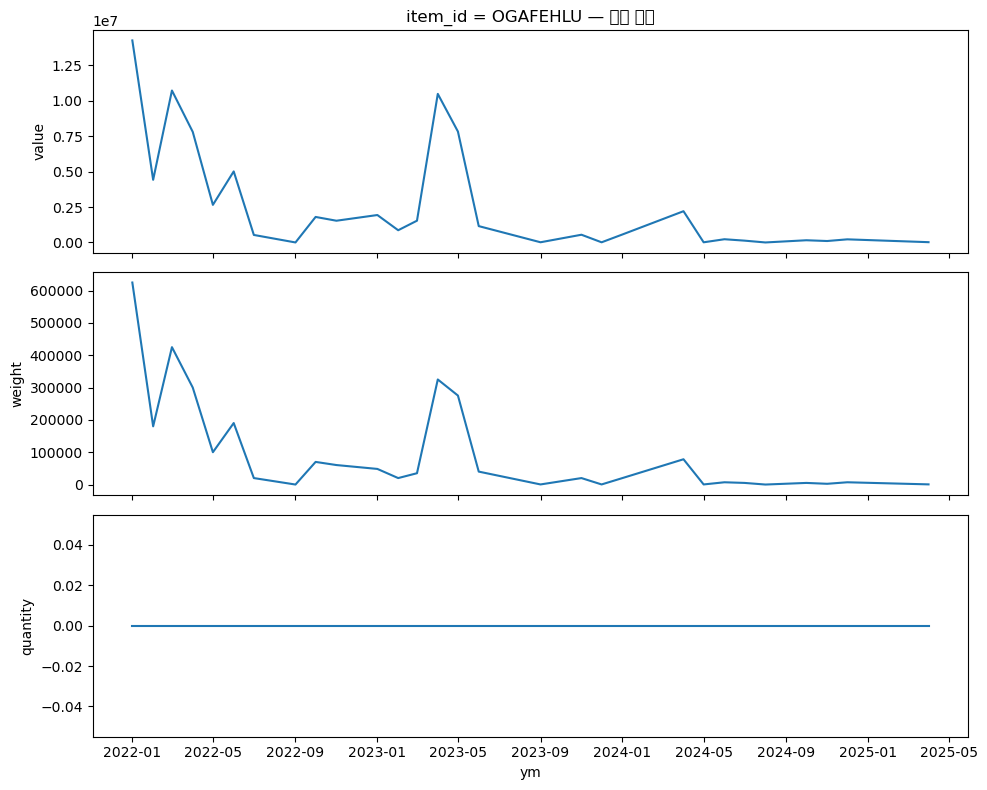

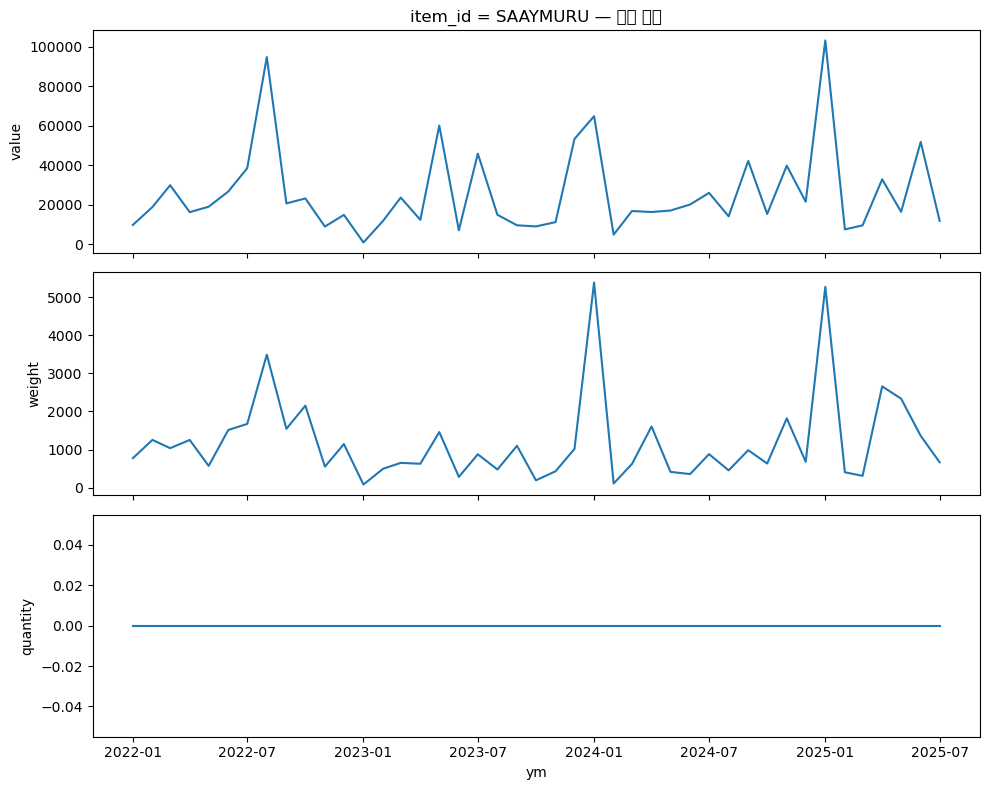

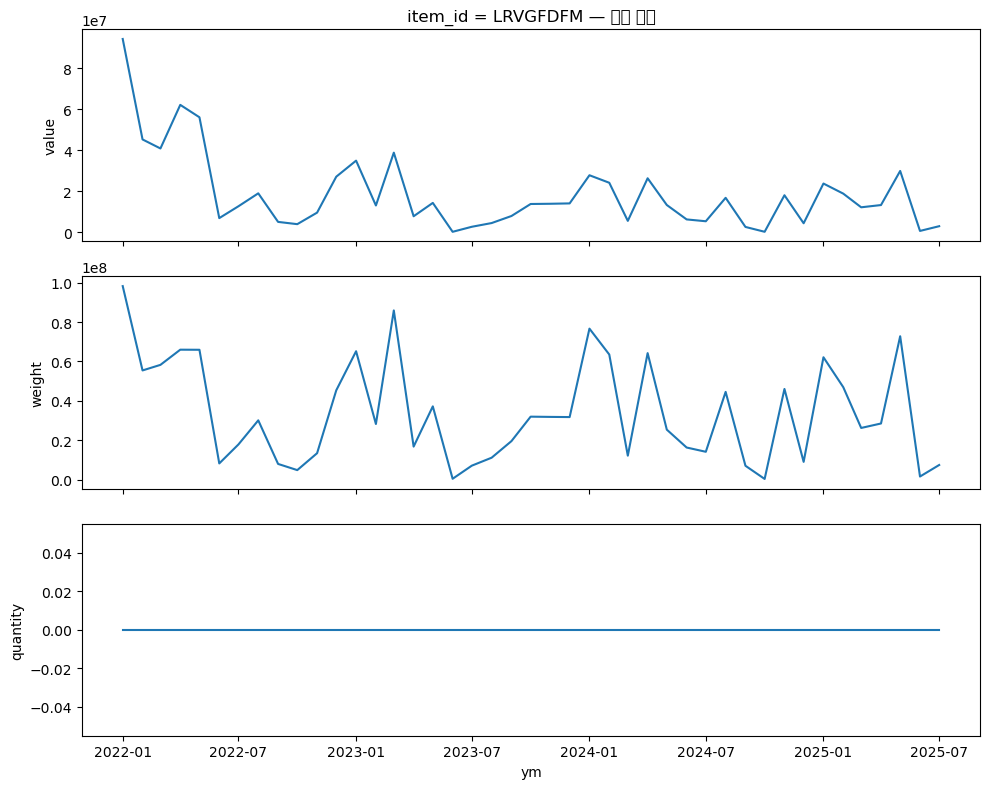

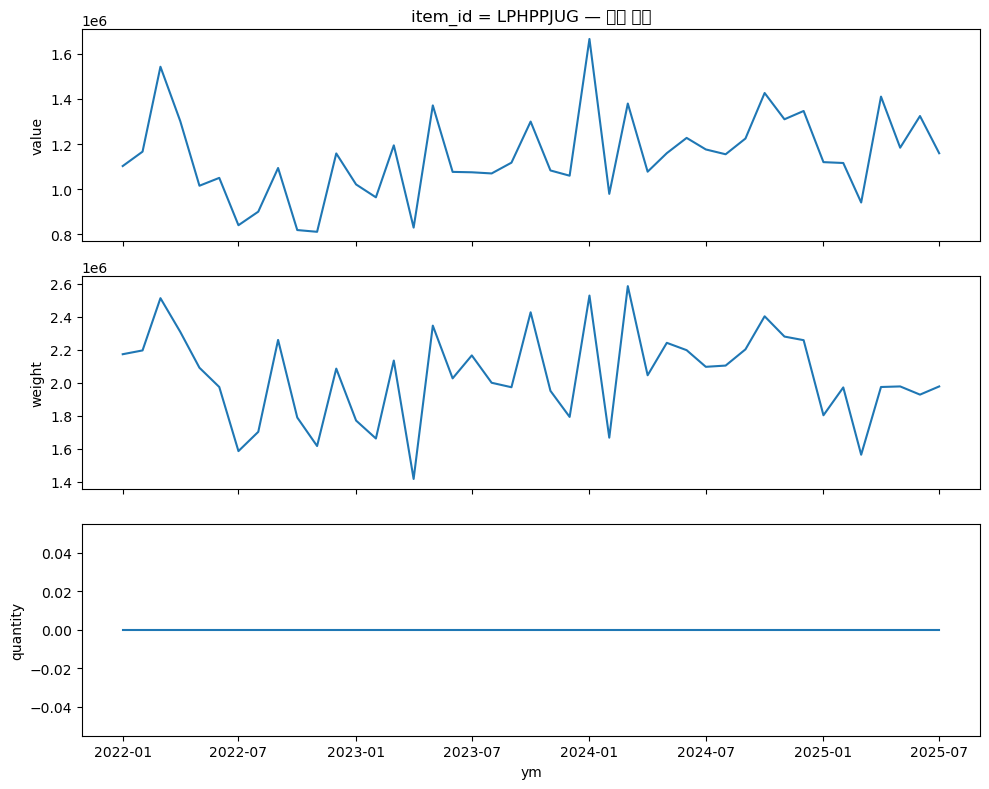

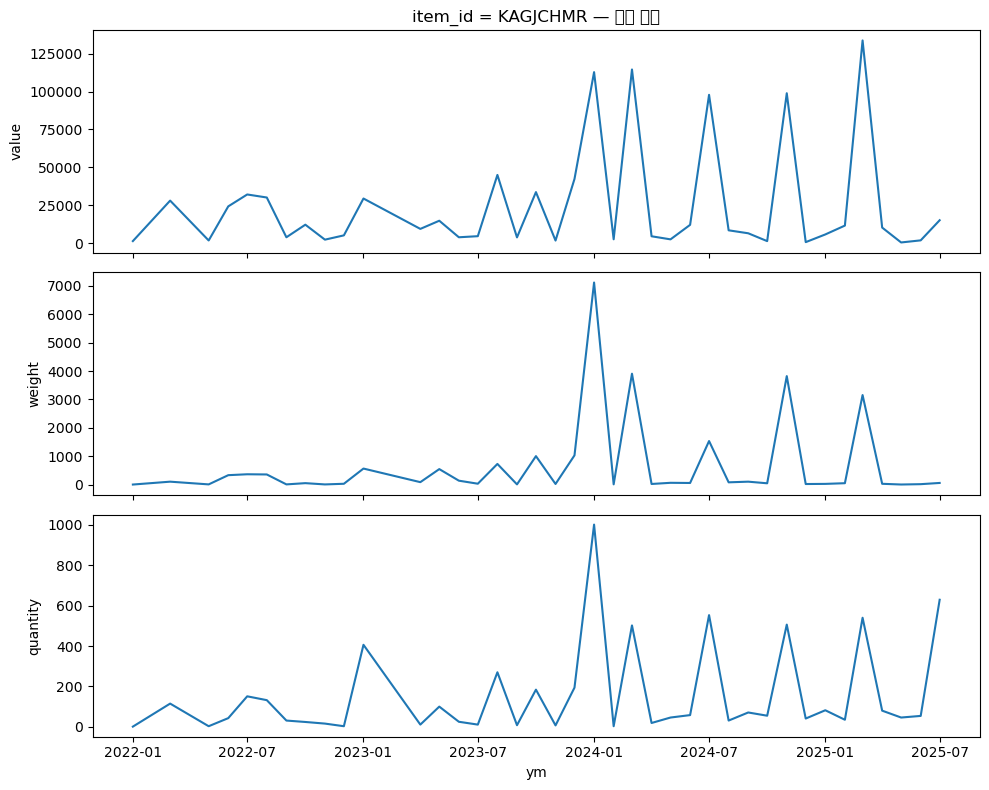

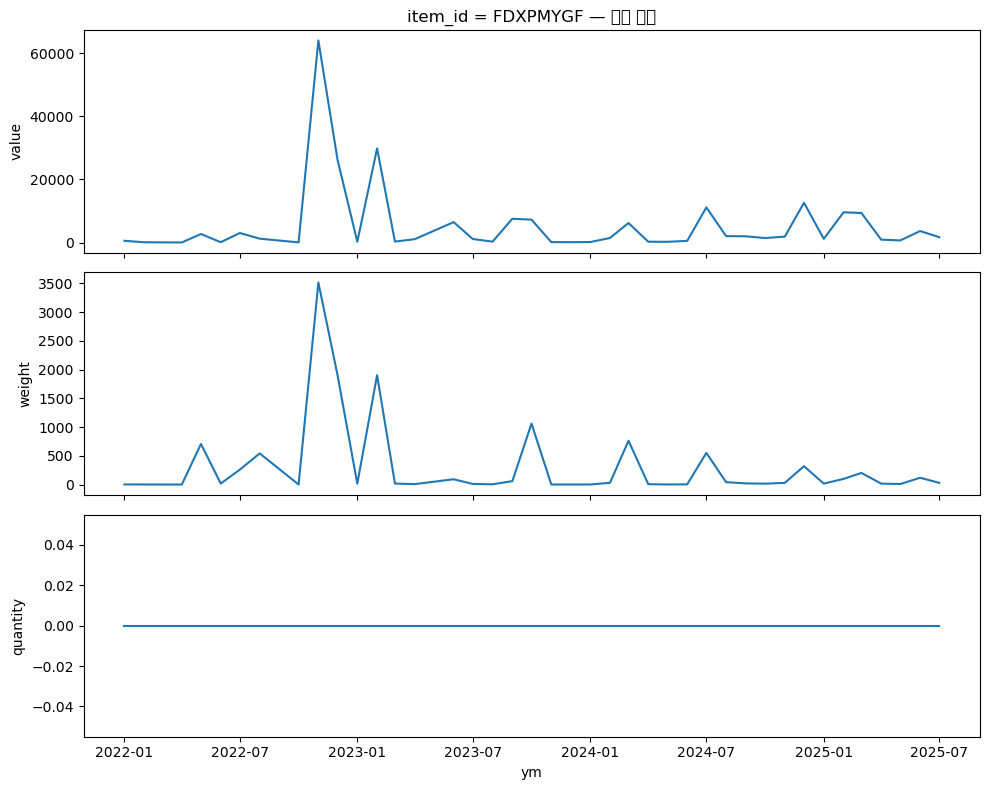

In [42]:
for item in sample_items:
    sub = (
        monthly[monthly["item_id"] == item]
        .sort_values(["year", "month"])
        .copy()
    )

    fig, axes = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
    
    axes[0].plot(sub["ym"], sub["value"])
    axes[0].set_ylabel("value")
    axes[0].set_title(f"item_id = {item} — 월별 패턴")

    axes[1].plot(sub["ym"], sub["weight"])
    axes[1].set_ylabel("weight")

    axes[2].plot(sub["ym"], sub["quantity"])
    axes[2].set_ylabel("quantity")
    axes[2].set_xlabel("ym")

    plt.tight_layout()
    plt.show()


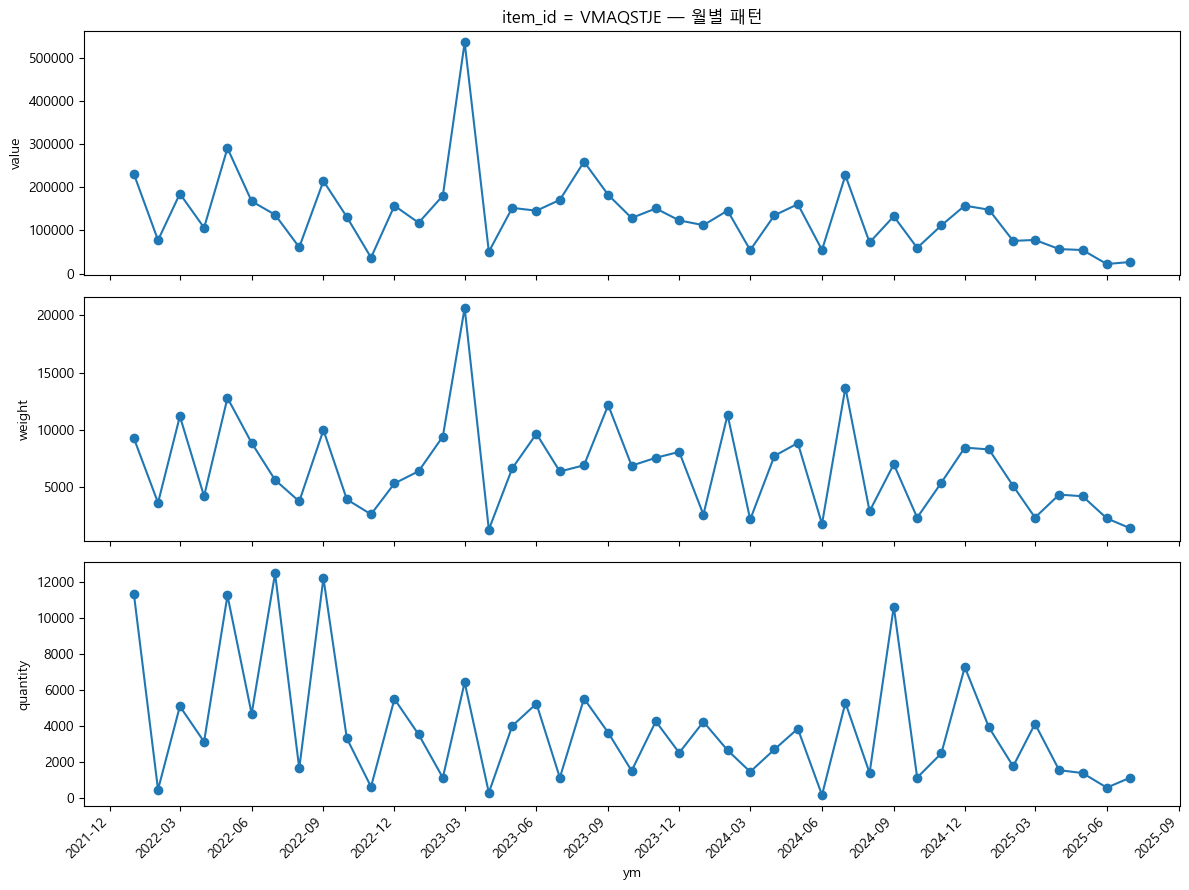

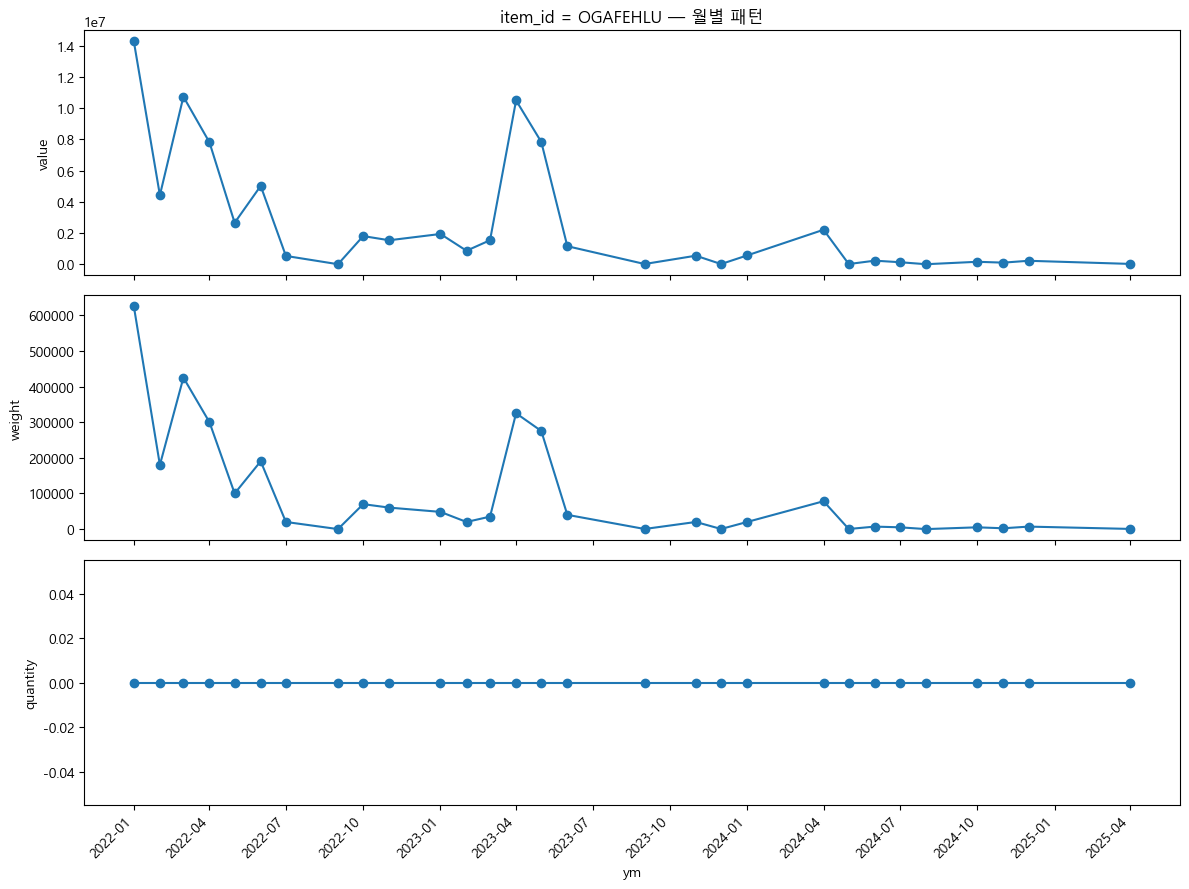

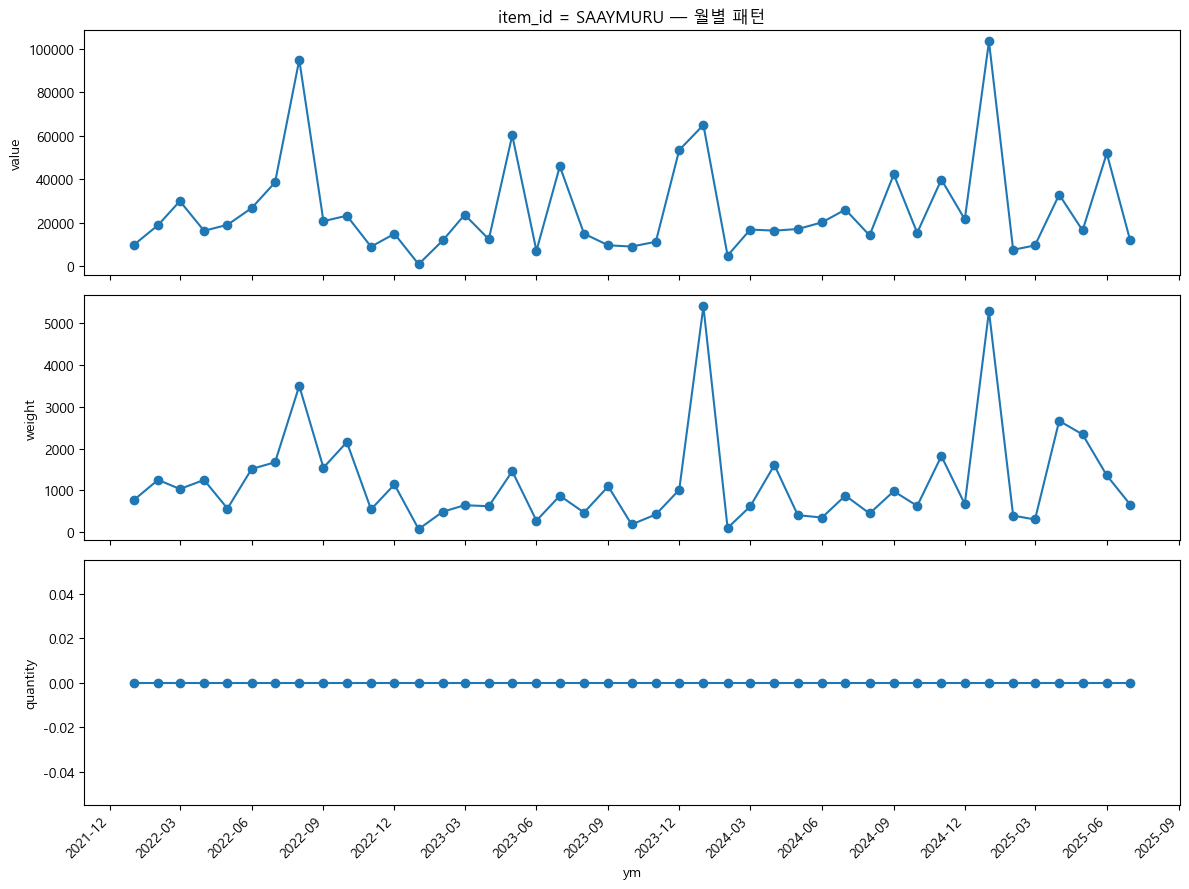

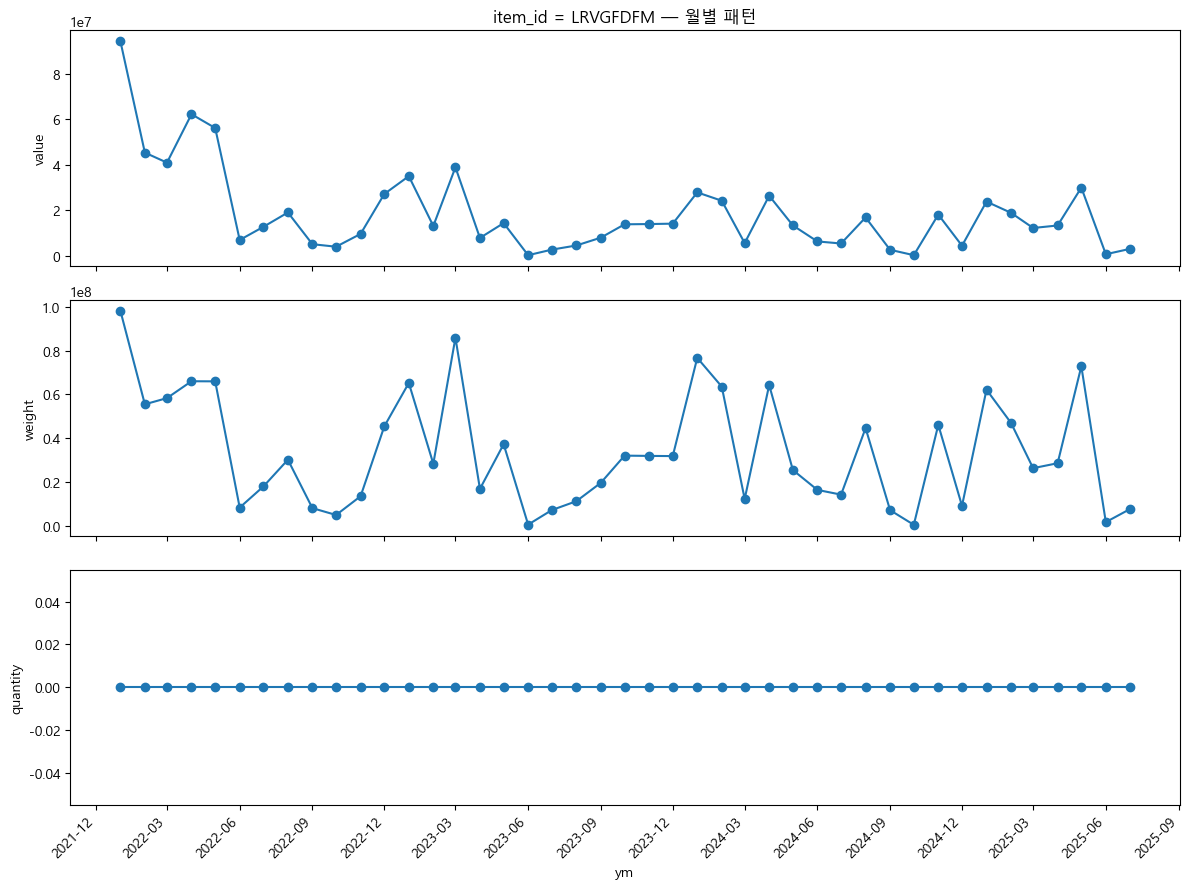

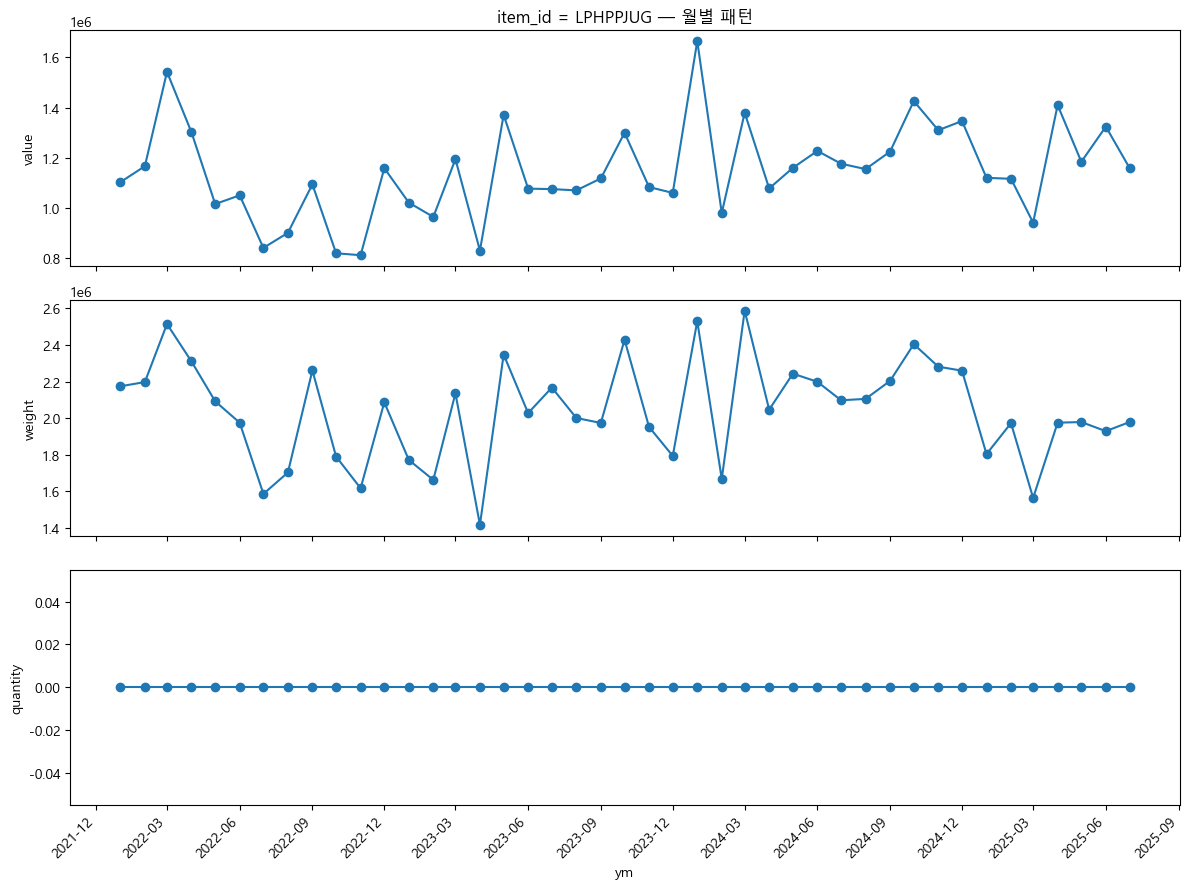

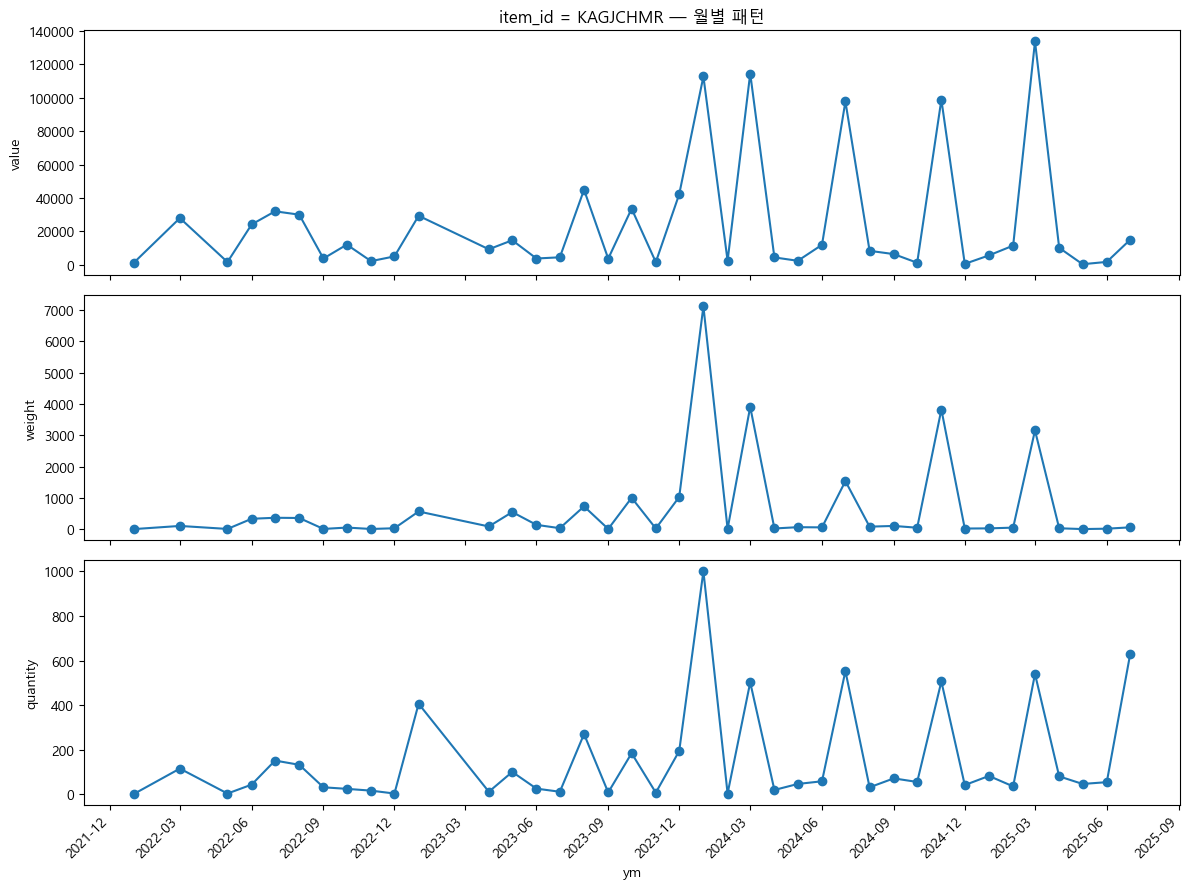

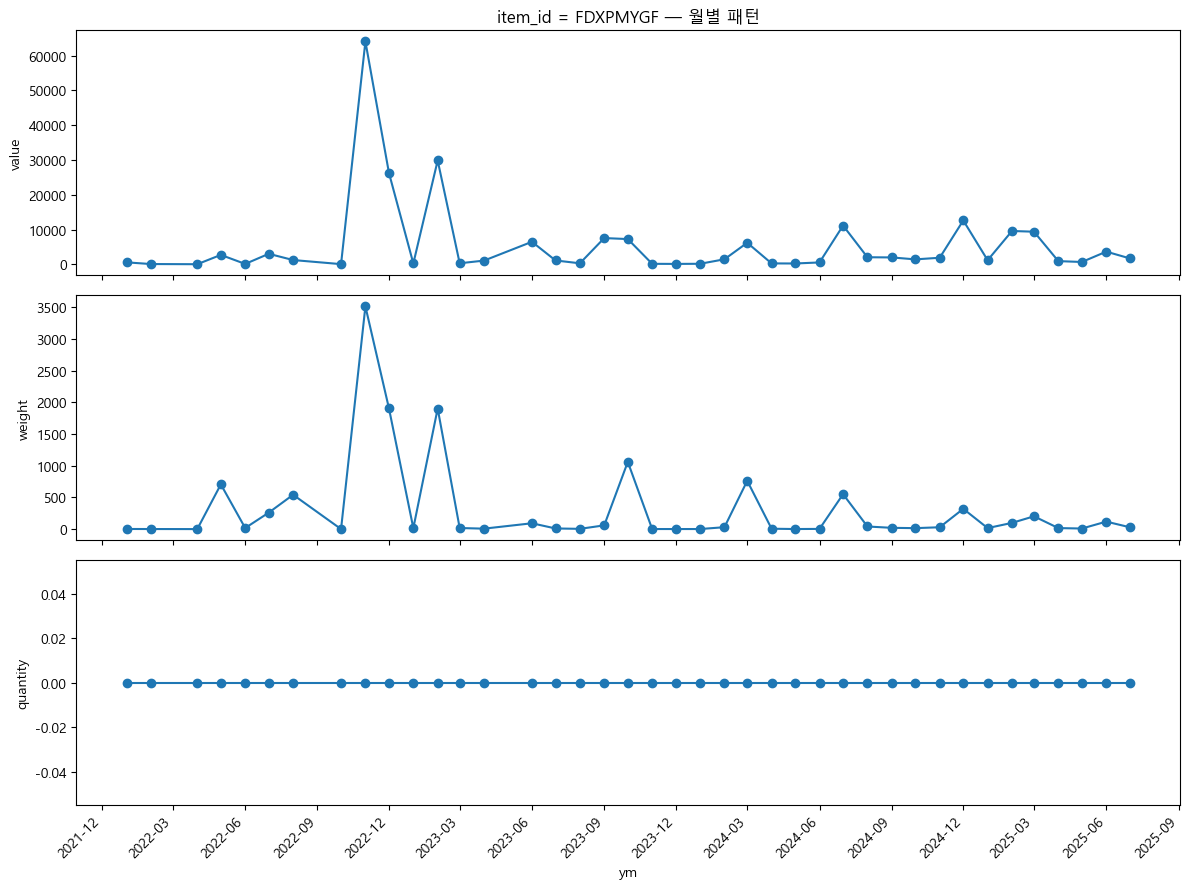

In [46]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# (윈도우 기준) 한글 폰트 설정 – 필요 없으면 이 부분은 생략해도 됨
plt.rcParams["font.family"] = "Malgun Gothic"   # 또는 'AppleGothic', 'NanumGothic' 등
plt.rcParams["axes.unicode_minus"] = False

for item in sample_items:
    sub = (
        monthly[monthly["item_id"] == item]
        .sort_values(["year", "month"])
        .copy()
    )

    fig, axes = plt.subplots(3, 1, figsize=(12, 9), sharex=True)

    # 공통: x축을 월 단위, 3개월 간격으로 표시
    for ax in axes:
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # 3개월마다 눈금
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))

    # 1) value
    axes[0].plot(sub["ym"], sub["value"], marker="o")
    axes[0].set_ylabel("value")
    axes[0].set_title(f"item_id = {item} — 월별 패턴")

    # 2) weight
    axes[1].plot(sub["ym"], sub["weight"], marker="o")
    axes[1].set_ylabel("weight")

    # 3) quantity
    axes[2].plot(sub["ym"], sub["quantity"], marker="o")
    axes[2].set_ylabel("quantity")
    axes[2].set_xlabel("ym")

    # x축 라벨 기울여서 겹침 방지
    plt.setp(axes[-1].get_xticklabels(), rotation=45, ha="right")

    plt.tight_layout()
    plt.show()


어떤 품목은 value가 계속 0 근처인지

어떤 품목은 특정 시점부터 확 튀는지

quantity는 거의 0인데 weight/value만 움직이는지

이런 것들을 케이스 스터디처럼 설명해주면 됨.

In [43]:
report_rows = []

for item in sample_items:
    sub = monthly[monthly["item_id"] == item]
    
    zero_ratio = (sub[["value", "weight", "quantity"]] == 0).mean()
    na_ratio   = sub[["value", "weight", "quantity"]].isna().mean()
    
    report_rows.append({
        "item_id": item,
        "value_zero_ratio": zero_ratio["value"],
        "weight_zero_ratio": zero_ratio["weight"],
        "quantity_zero_ratio": zero_ratio["quantity"],
        "value_na_ratio": na_ratio["value"],
        "weight_na_ratio": na_ratio["weight"],
        "quantity_na_ratio": na_ratio["quantity"],
        "n_months": len(sub)
    })

item_report = pd.DataFrame(report_rows)
item_report

# 어떤 item은 quantity가 항상 0이다
#어떤 item은 value가 특정 구간에서만 등장한다 같은 식으로 micro-level insight 뽑으면 됨

,item_id,value_zero_ratio,weight_zero_ratio,quantity_zero_ratio,value_na_ratio,weight_na_ratio,quantity_na_ratio,n_months
0,VMAQSTJE,0.0,0.00,0.0,0.0,0.0,0.0,43
1,OGAFEHLU,0.0,0.00,1.0,0.0,0.0,0.0,29
2,SAAYMURU,0.0,0.00,1.0,0.0,0.0,0.0,43
3,LRVGFDFM,0.0,0.00,1.0,0.0,0.0,0.0,43
4,LPHPPJUG,0.0,0.00,1.0,0.0,0.0,0.0,43
5,KAGJCHMR,0.0,0.00,0.0,0.0,0.0,0.0,39
6,FDXPMYGF,0.0,0.05,1.0,0.0,0.0,0.0,40


In [44]:
# item_id별 대표 hs4 (가장 많이 등장한 hs4)
item_hs4 = (
    df.groupby("item_id")["hs4"]
      .agg(lambda x: x.value_counts().idxmax())
)

sample_hs4 = item_hs4.loc[sample_items]
sample_hs4 = sample_hs4.reset_index().rename(columns={"hs4": "rep_hs4"})

sample_hs4

,item_id,rep_hs4
0,VMAQSTJE,8527
1,OGAFEHLU,7202
2,SAAYMURU,3215
3,LRVGFDFM,3102
4,LPHPPJUG,3824
5,KAGJCHMR,8467
6,FDXPMYGF,7907


In [45]:
item_report = item_report.merge(sample_hs4, on="item_id", how="left")
item_report
# 이 item은 HS4 코드가 0303(생선류)라서 weight만 의미 있고 quantity는 거의 0이다

,item_id,value_zero_ratio,weight_zero_ratio,quantity_zero_ratio,value_na_ratio,weight_na_ratio,quantity_na_ratio,n_months,rep_hs4
0,VMAQSTJE,0.0,0.00,0.0,0.0,0.0,0.0,43,8527
1,OGAFEHLU,0.0,0.00,1.0,0.0,0.0,0.0,29,7202
2,SAAYMURU,0.0,0.00,1.0,0.0,0.0,0.0,43,3215
3,LRVGFDFM,0.0,0.00,1.0,0.0,0.0,0.0,43,3102
4,LPHPPJUG,0.0,0.00,1.0,0.0,0.0,0.0,43,3824
5,KAGJCHMR,0.0,0.00,0.0,0.0,0.0,0.0,39,8467
6,FDXPMYGF,0.0,0.05,1.0,0.0,0.0,0.0,40,7907


### 5번 다른버전

In [53]:
def plot_item_series(item_id, monthly):
    sub = (
        monthly[monthly["item_id"] == item_id]
        .sort_values(["year", "month"])
        .copy()
    )
    
    fig, axes = plt.subplots(3, 1, figsize=(12, 9), sharex=True)
    
    for ax in axes:
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
        ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    
    axes[0].plot(sub["ym"], sub["value"], marker="o")
    axes[0].set_ylabel("value")
    axes[0].set_title(f"item_id = {item_id} — 월별 패턴")
    
    axes[1].plot(sub["ym"], sub["weight"], marker="o")
    axes[1].set_ylabel("weight")
    
    axes[2].plot(sub["ym"], sub["quantity"], marker="o")
    axes[2].set_ylabel("quantity")
    axes[2].set_xlabel("ym")
    
    plt.setp(axes[-1].get_xticklabels(), rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


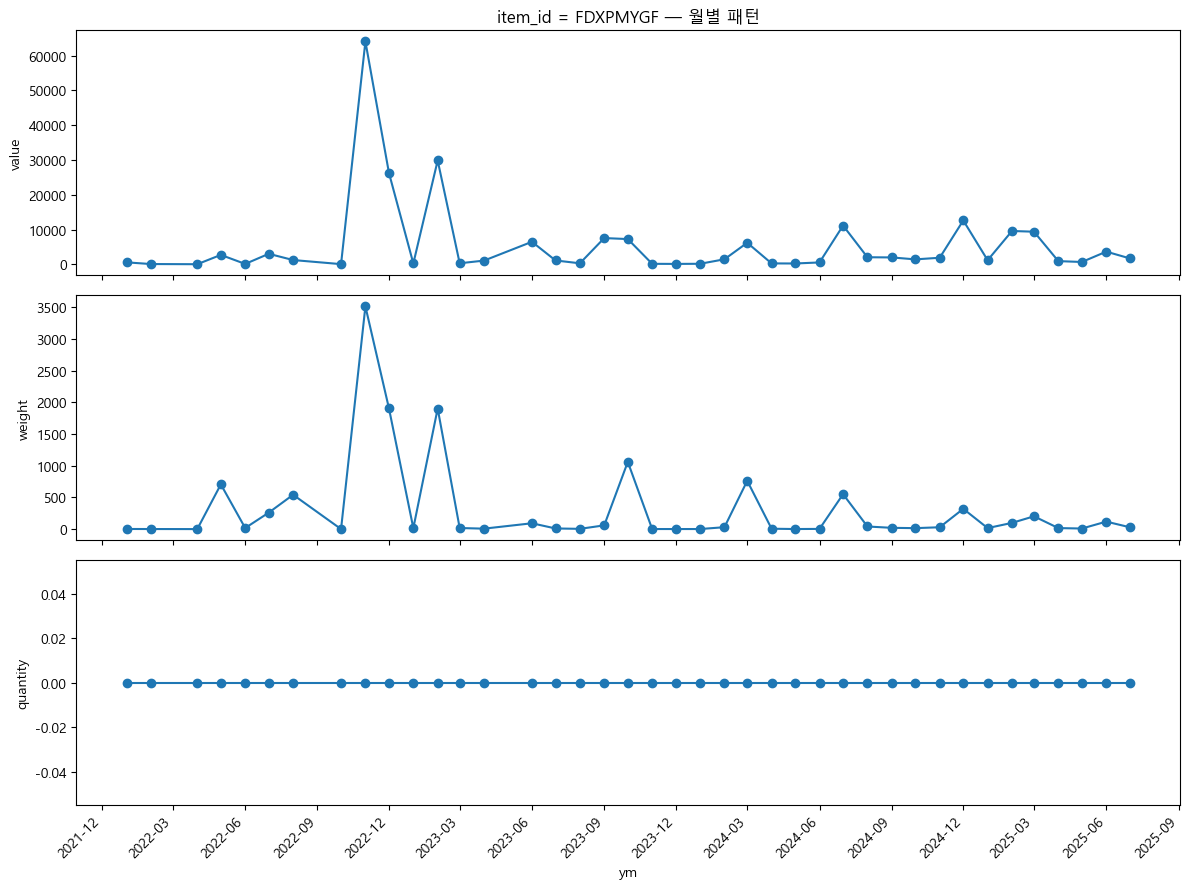

In [59]:
plot_item_series(sample_items[6], monthly)

In [60]:
reports = []

for item in sample_items:
    sub = (
        monthly[monthly["item_id"] == item]
        .sort_values(["year", "month"])
        .copy()
    )
    
    # 시간 인덱스
    sub["t"] = np.arange(len(sub))
    
    # 0 비율
    zero_ratio = (sub[["value", "weight", "quantity"]] == 0).mean()
    
    # 변동성 (CV = 표준편차 / 평균)
    def cv(x):
        m = x.mean()
        return np.nan if m == 0 else x.std() / m
    
    cv_value = cv(sub["value"])
    cv_weight = cv(sub["weight"])
    
    # 간단한 추세: value에 대한 기울기 (선형회귀)
    a, b = np.polyfit(sub["t"], sub["value"], 1)
    
    reports.append({
        "item_id": item,
        "n_months": len(sub),
        "value_zero_ratio": zero_ratio["value"],
        "weight_zero_ratio": zero_ratio["weight"],
        "quantity_zero_ratio": zero_ratio["quantity"],
        "cv_value": cv_value,
        "cv_weight": cv_weight,
        "trend_slope_value": a,  # >0: 우상향, <0: 우하향
    })

item_deep_report = pd.DataFrame(reports)
item_deep_report


,item_id,n_months,value_zero_ratio,weight_zero_ratio,quantity_zero_ratio,cv_value,cv_weight,trend_slope_value
0,VMAQSTJE,43,0.0,0.00,0.0,0.648332,0.600501,-2628.509212
1,OGAFEHLU,29,0.0,0.00,1.0,1.461383,1.557634,-276895.433990
2,SAAYMURU,43,0.0,0.00,1.0,0.865253,0.973672,138.542736
3,LRVGFDFM,43,0.0,0.00,1.0,1.011806,0.768461,-721591.500604
4,LPHPPJUG,43,0.0,0.00,1.0,0.164903,0.135806,4598.594533
5,KAGJCHMR,39,0.0,0.00,0.0,1.451593,2.217542,474.957085
6,FDXPMYGF,40,0.0,0.05,1.0,2.099815,2.244132,-130.670732


In [61]:
rows = []

for item in sample_items:
    sub = monthly[monthly["item_id"] == item]
    
    corr = sub[["value", "weight", "quantity"]].corr()
    
    rows.append({
        "item_id": item,
        "corr_v_w": corr.loc["value", "weight"],
        "corr_v_q": corr.loc["value", "quantity"],
        "corr_w_q": corr.loc["weight", "quantity"],
        "n_months": len(sub)
    })

item_corr_report = pd.DataFrame(rows)
item_corr_report


,item_id,corr_v_w,corr_v_q,corr_w_q,n_months
0,VMAQSTJE,0.888170,0.559793,0.496679,43
1,OGAFEHLU,0.989459,NaN,NaN,29
2,SAAYMURU,0.782865,NaN,NaN,43
3,LRVGFDFM,0.864018,NaN,NaN,43
4,LPHPPJUG,0.835981,NaN,NaN,43
5,KAGJCHMR,0.876276,0.841083,0.850292,39
6,FDXPMYGF,0.942846,NaN,NaN,40


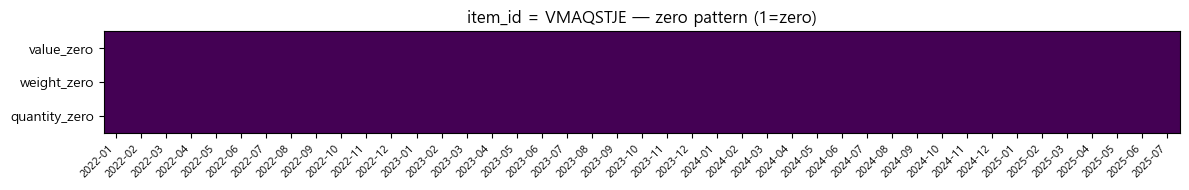

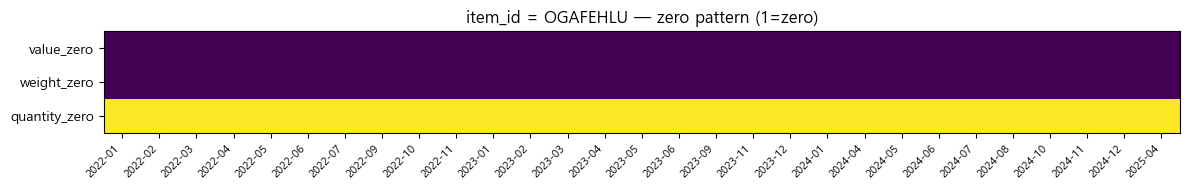

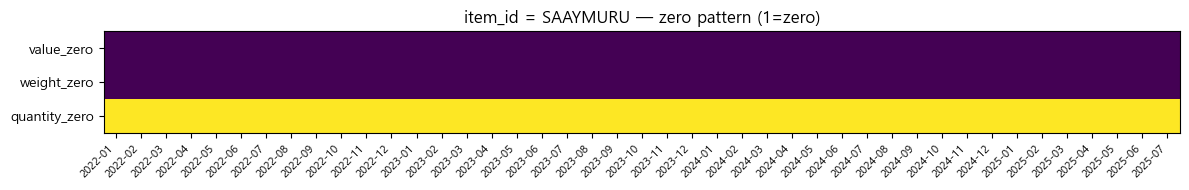

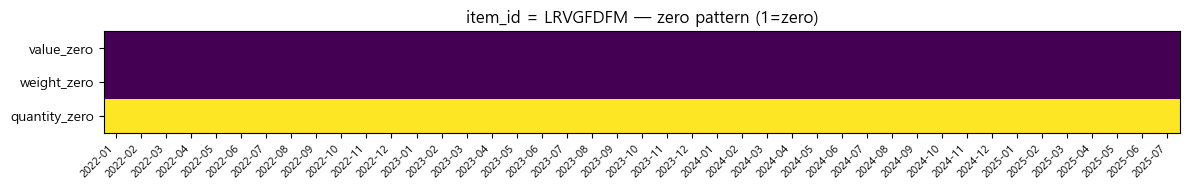

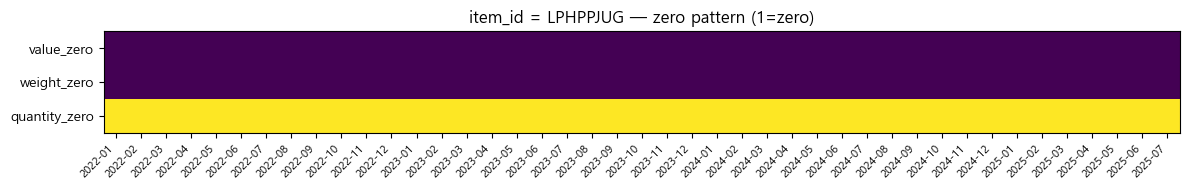

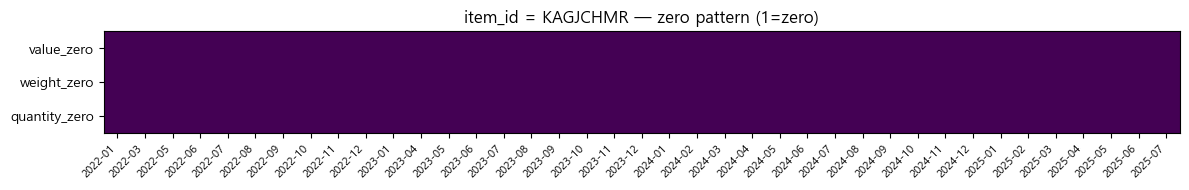

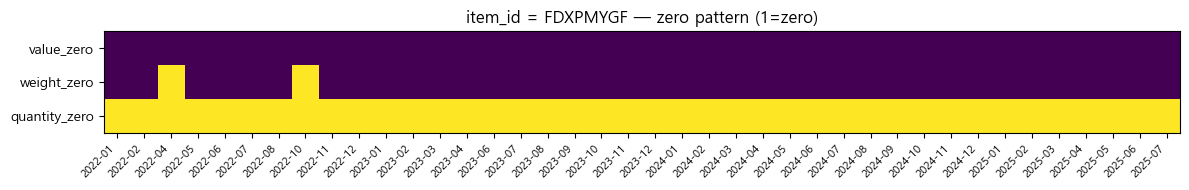

In [62]:
for item in sample_items:
    sub = (
        monthly[monthly["item_id"] == item]
        .sort_values(["year", "month"])
        .copy()
    )
    sub["ym_str"] = sub["ym"].dt.strftime("%Y-%m")
    
    z_matrix = (sub[["value", "weight", "quantity"]] == 0).astype(int).T  # 3 x T
    fig, ax = plt.subplots(figsize=(12, 2))
    im = ax.imshow(z_matrix, aspect="auto")
    
    ax.set_yticks(range(3))
    ax.set_yticklabels(["value_zero", "weight_zero", "quantity_zero"])
    ax.set_xticks(range(len(sub)))
    ax.set_xticklabels(sub["ym_str"], rotation=45, ha="right", fontsize=8)
    
    ax.set_title(f"item_id = {item} — zero pattern (1=zero)")
    plt.tight_layout()
    plt.show()


1. 패턴 읽는 법

각 item 그래프에서 **한 칸 = “해당 월, 해당 변수의 0 여부”**

열(column) 전체가 노란색

value_zero = 1, weight_zero = 1, quantity_zero = 1
→ 그 달은 세 변수 다 0 = 아예 거래가 없었던 달

value_zero/weight_zero는 보라, quantity_zero만 노랑
→ value·weight는 항상 >0인데, quantity만 계속 0
→ “이 품목은 수량을 아예 기록 안 한다” 타입

세 줄 다 보라색만 있는 경우
→ 그 item은 관측된 모든 달에 value/weight/quantity가 다 >0
→ 거래가 꾸준하고, 수량도 항상 기록되는 안정형 품목

가운데 몇 달만 노란색(줄무늬)

예: 초반에는 보라(거래 있음) → 중간 몇 달 노랑(거래 없음) → 다시 보라
→ 그 item은 중간에 거래가 끊겼다가 다시 재개된 품목

2. 내가 뽑아본 예시 3개를 기준으로 해석해보면

(내가 train.csv로 똑같은 코드를 돌려봤을 때 이런 그림이 나왔어)

item = FTSVTTSR

value_zero, weight_zero 행은 전부 보라 →
→ 분석 기간 내내 value/weight가 0이 아닌 달만 존재

quantity_zero 행은 전부 노랑 →
→ quantity는 모든 달이 0

👉 해석:

“이 품목은 분석 기간 동안 매달 일정 수준 거래가 있었지만,
수량(quantity)은 시스템 상 아예 기록되지 않는 구조다.
→ 이 item에서는 quantity 피처를 쓰지 않는 게 낫다.”

item = WBLJNPZQ

세 행이 전부 보라 →
→ value, weight, quantity 모두 한 번도 0인 적이 없음

👉 해석:

“이 품목은 거래가 매우 연속적이며,
금액·중량·수량이 항상 함께 기록되는 안정적인 품목이다.
→ quantity까지 포함한 3변수 모두를 신뢰할 수 있다.”

item = ANWUJOKX

관측된 몇 개의 달만 있고, 그 기간 동안 세 행이 전부 보라
→ 그 짧은 기간 동안은 계속 거래가 있었고, 세 변수 모두 0이 아님
→ 다만 활성 기간 자체가 짧은 단발성 품목일 수 있음

👉 해석:

“일정 기간 동안만 집중적으로 거래된 뒤 더 이상 나타나지 않는 일회성 품목이며,
활성 구간 외 월은 아예 데이터가 없다(=zero month 자체가 적다).”

In [84]:
df[(df['hs4']==5512)&(df['quantity']==0)]

,item_id,year,month,seq,type,hs4,weight,quantity,value,log_weight,log_value,log_quantity,unit_value_w,unit_value_q,log_unit_value_w,log_unit_value_q,resid_log_vw
461,WHPUAOID,2022,2,3.0,1,5512,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-4.324871
710,WHPUAOID,2022,3,3.0,1,5512,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-4.324871
873,WHPUAOID,2022,4,2.0,1,5512,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-4.324871
957,WHPUAOID,2022,4,3.0,1,5512,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-4.324871
1380,WHPUAOID,2022,6,2.0,1,5512,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-4.324871
1468,WHPUAOID,2022,6,3.0,1,5512,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-4.324871
1634,WHPUAOID,2022,7,2.0,1,5512,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-4.324871
1723,WHPUAOID,2022,7,3.0,1,5512,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-4.324871
3218,WHPUAOID,2023,1,3.0,1,5512,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-4.324871
3477,WHPUAOID,2023,2,3.0,1,5512,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-4.324871


In [88]:
df[(df['year']== 2023) & (df['month']==8)]['quantity'].unique()

array([0.00000000e+00, 7.92598955e+08, 6.72200000e+03, 4.62500000e+03,
       1.09600000e+03, 8.80900000e+03, 6.09401000e+05, 7.90000000e+02,
       4.90938000e+05, 2.00000000e+00, 2.56000000e+02, 1.60000000e+01,
       4.70000000e+01, 1.16600000e+03, 2.76000000e+02, 4.21000000e+03,
       8.30000000e+02, 4.21800000e+03, 1.53400000e+03, 1.63716000e+05,
       4.35400000e+03, 4.83767000e+05, 4.00000000e+00, 2.90000000e+01,
       2.15500000e+03, 1.68000000e+02, 1.00000000e+00, 7.38300000e+03,
       5.40000000e+01, 2.18600000e+03, 2.60200000e+03, 2.75260000e+04,
       3.29344000e+05, 5.87400000e+03, 7.98661000e+05, 1.40000000e+01,
       2.70000000e+01, 4.30000000e+01, 2.19900000e+03, 6.79000000e+02])

In [89]:
df['hs4'].unique()

array([3038, 2002, 2102, 2501, 2529, 2805, 2807, 2811, 2814, 2825, 2833,
       2836, 2841, 2846, 2847, 2916, 3006, 3102, 3206, 3207, 3215, 3307,
       3404, 3806, 3815, 3824, 3904, 3909, 4202, 4601, 4802, 5111, 5205,
       5309, 5402, 5515, 5602, 5609, 5705, 6101, 6211, 7202, 7207, 8102,
       8105, 8461, 8467, 8479, 8501, 8505, 8527, 8708, 8714, 9403, 1210,
       3813, 4408, 4810, 5512, 2701, 7907, 2710, 6006, 5119, 9022, 4403,
       3003, 2612, 4302, 7142, 3024], dtype=int64)

In [92]:
df[df['item_id']=='WHPUAOID']['hs4'].unique()

array([5512], dtype=int64)

In [93]:
# item_id 별 hs4 코드가 몇 종류씩 있는지 계산
hs4_per_item = (
    df.groupby("item_id")["hs4"]
      .nunique()              # 고유 hs4 개수
      .sort_values(ascending=False)
)

# 전체 요약
print(hs4_per_item.head())    # hs4 종류가 가장 많은 item 상위 몇 개
print("item_id 개수:", len(hs4_per_item))
print("hs4 종류가 1개인 item 비율:",
      (hs4_per_item == 1).mean() * 100, "%")

# hs4가 2종류 이상인 item만 보고 싶으면
multi_hs4_items = hs4_per_item[hs4_per_item > 1]
print("hs4가 2개 이상인 item 수:", len(multi_hs4_items))
multi_hs4_items.head()

item_id
AANGBULD    1
QVLMOEYE    1
SNHYOVBM    1
SDWAYPIK    1
SAHWCZNH    1
Name: hs4, dtype: int64
item_id 개수: 100
hs4 종류가 1개인 item 비율: 100.0 %
hs4가 2개 이상인 item 수: 0


Series([], Name: hs4, dtype: int64)